# 1. adaptive semi supervised feature selection for cross-model retrieval


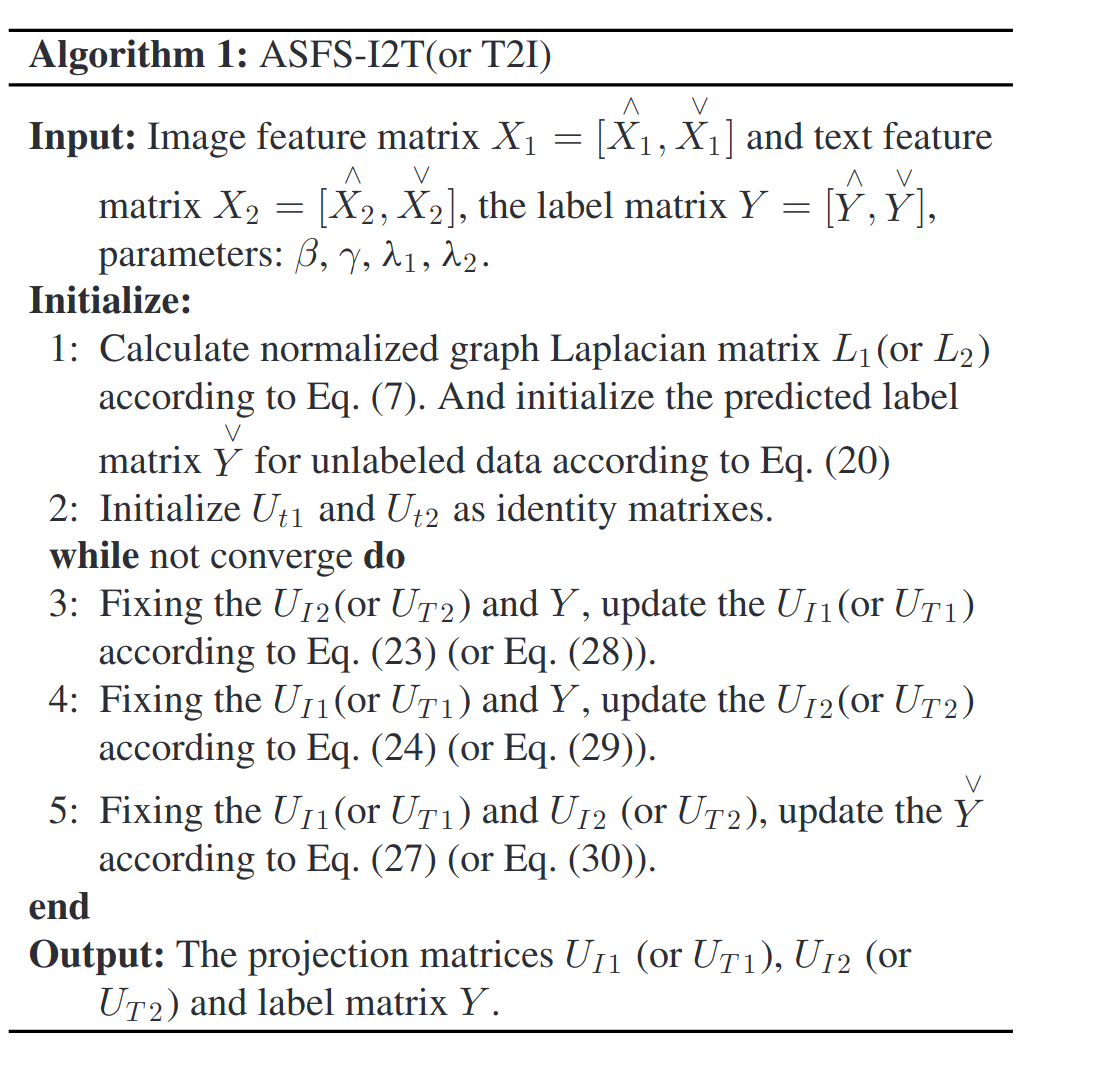

In [ ]:
#we firstly propose preserving semantic
#consistency between query modal feature space and semantic
#space by the linear regression

#in the subspace, the decision function is linear? 

In [1]:



#get weight matrixd for k nearest neighbours!
#for task q



k=4


import pandas as pd
import tqdm
import scipy
import numpy as np
import torch


#---------



def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

def k_nearest_neighbors(X, dataset, k):
    """Find the k nearest neighbors of X in the dataset using the Euclidean distance."""
    # Calculate distances from X to all points in the dataset
    distances = []
    for point in dataset:
        distance = euclidean_distance(X, point)
        distances.append((point, distance))
    
    # Sort the distances
    distances.sort(key=lambda x: x[1])
    
    # Return the k nearest neighbors
    return [neighbor[0] for neighbor in distances[:k]]

def k_nearest_neighbors_indices_vectorized(X, dataset, k):
    """Find the k nearest neighbors of X in the dataset using vectorized operations."""
    
    
    
    
    X = np.array(X)
    dataset = np.array(dataset)

    # Calculate squared Euclidean distances in a vectorized way
    distances = np.sum((dataset - X) ** 2, axis=1)

    # Get the indices of the k smallest distances
    nearest_indices = np.argsort(distances)#[:k]

    # Return the k nearest neighbors
    return nearest_indices

#---------------------------------------
#EQUATION 6
#---------------------------------------

def get_weight_matrix_eq_6(feature,k=10):
    
    return
    
    #get knn for all features, use l2 norm as distance measure?
    
    
    
    import torch

def compute_nn_idx_dict(features,n_neighbours=4):




    # for each one, get idx of nearest neighbour...
    k = n_neighbours  # Number of neighbors to find
    STD=1 # ? not sure

    nn_idx_dict={}
    for i,X in tqdm.tqdm(enumerate(features)):
        LHS=features[:i]
        RHS=features[i+1:]
        dataset=np.concatenate((LHS,RHS))#.shape
        nn_idx = k_nearest_neighbors_indices_vectorized(X, dataset, k)[:k]
        nn_idx_dict[i]=nn_idx
        
    return(nn_idx_dict)


def get_D_q(combined_features):
        
        
    weights=np.zeros((combined_features.shape[0],combined_features.shape[0]))

    STD=1

    wlist=[]

    for k in nni.keys():
        xi=combined_features[k]#.numpy()
        for j in nni[k]:
            xj=combined_features[j]#.numpy()
            wl=np.exp(-np.sum((xi-xj)**2)/(2*(STD**2)))
            weights[k,j]=wl
            wlist.append(wl)
            
        

    diags=np.sum(weights,axis=1)
    D_q=np.eye(diags.shape[0])*diags
    
    return(D_q)



#dd=split_L1(dd)
#



#now get normalised laplace matrix....
# EQ 7
# normalized graph Laplacain matrix Lq 




#should modify it so that we have X2,X1, and double check our Ut1 etc matrices!!

class data_container:
    
    
    def __init__(self,n_neighbours=4,debug=True):
        
        self.n_neighbours=n_neighbours
        self.debug=debug
        self.eps=1e-3 #for calc R matrix
        
        self.task='1_to_2' #should be either '2_to_1' or '1_to_2'
        
        #if 1_to_2, then we use U_11, U_12,
        
        #if 2_to_1, then we use U21, U_22
        
        
        print(f'create new class with neighbours: {n_neighbours}')
        

    def initialise_Y_hat_eq_20(self):
            
            
        print('initialising estimate of Y hat (eq 20)')
        
        
        L_uu=self.L_uu#['L_uu'] #laplace matrix for unlabelled-unlabelled portion weights
        L_ul=self.L_ul#['L_ul'] #laplace matrix for unlabelled-labelled portion weights
        L_label=self.L_Y#['L_Y'] #ground truth labelled data
        
        self.Y_hat=-np.linalg.inv(L_uu) @ L_ul @ L_label#.numpy()
        
        
        
        
        
        return self
    
    def combine_L_Y_and_Y_hat(self):
        
        
        print('combining L_Y with Y_hat (unlabelled)')
        
        Y_hat=self.Y_hat
        
        
        L_Y=self.L_Y
        
        
        Y=np.concatenate((L_Y,Y_hat),0)
        
        
        self.Y=Y
        
        
        return self
                
    def split_L1(self):
        
        print('splitting L_uu and L_ul')
        L_1=self.L_1
        U_0=self.U_0
        U_end=self.U_end
        L_0=self.L_0
        L_end=self.L_end
        L_ul=L_1[U_0:U_end,L_0:L_end]#.shape
        L_uu=L_1[U_0:U_end,U_0:U_end]#.shape
        
        self.L_ul=L_ul
        self.L_uu=L_uu
        
        return self

    def compute_laplace_matrix(self):
        
        print('computing laplace matrix')
        
        
        features=np.transpose(self.X)
        
        distances=scipy.spatial.distance.pdist(features)
        
        sigma=np.median(distances)
        
        STD=sigma
        
        print('sigma')
        print(STD)
        # for each one, get idx of nearest neighbour...
        k = self.n_neighbours  # Number of neighbors to find
        #STD=1 # ? not sure

        nn_idx_dict={}
        for i,X in tqdm.tqdm(enumerate(features)):
            LHS=features[:,:i]
            RHS=features[:,i+1:]
            dataset=np.concatenate((LHS,RHS),axis=1)#.shape
            nn_idx = k_nearest_neighbors_indices_vectorized(X, dataset, k)[:k]
            nn_idx_dict[i]=nn_idx
        #calc sum...
        #numerator=np.sum([(X-n)**2 for n in nearest_neighbors])
        #denom=2*STD*2
        #w_ij=np.exp(-numerator/denom)
        #its wrong you want to make lookup for each indiviual node
        #and if the pair is in the nearest neighbour, set waeight to x_i-x_j etc, OR else, if not in, set=0
        #now get that 2_2 norm...
        #Overall, it means the sum of square of the components.
            
        weights=np.zeros((features.shape[0],features.shape[0]))
        for k in nn_idx_dict.keys():
            xi=features[k]#.numpy()
            for j in nn_idx_dict[k]:
                xj=features[j]#.numpy()
                weights[k,j]=np.exp(-np.sum((xi-xj)**2)/(2*(STD**2)))



        #get colsums...
        diags=np.sum(weights,axis=1)
        D_q=np.eye(diags.shape[0])*diags
        #now get normalised laplace matrix....
        # EQ 7
        # normalized graph Laplacain matrix Lq 
        #LP_normed=np.sqrt(D_q)*(D_q-weights)*np.sqrt(D_q)
        LP_normed=np.sqrt(D_q)@(D_q-weights) @ np.sqrt(D_q)

        self.L_1=LP_normed

        return self

    def read_data(self,L_Y_fn,L_X_fn,U_X_fn,X1_idx=[0,1],X2_idx=[2,3]):
        print('reading data')
        if self.debug:
        
            print('warning reading data with just 100 unlabelled for speed computation / debug. remove for final algo!')
            
            U_X=torch.load(U_X_fn)[:100].numpy() #doing trial
            
            U_X=np.transpose(U_X)
            
            
            
            
        else:
            
            U_X=torch.load(U_X_fn).transpose().numpy() #doing trial
        
        
        L_Y=torch.load(L_Y_fn).numpy()
        L_X=torch.load(L_X_fn).numpy()
        
        L_X=np.transpose(L_X)
        
        X=np.concatenate((L_X,U_X),axis=1)
        
            
        L_0=0
        L_end=L_X.shape[1]
        U_0=L_X.shape[1]
        U_end=X.shape[1]
        
        
        # dd['U_X']=U_X
        # dd['L_X']=L_X
        # dd['L_Y']=L_Y
        
        
        self.U_X=U_X
        self.L_X=L_X
        self.L_Y=L_Y
        
        
        self.X1=X[X1_idx,:]
        self.X2=X[X2_idx,:]
        
        
        self.L_0=L_0
        
        self.L_end=L_end
        self.U_0=U_0
        self.U_end=U_end
        
        return self
    
    def initialise_u1_u2(self):
        
        print('initalisng u1 u2')
                
        #U_t1=np.eye(*self.L_uu.shape) #should be L1? ie not L_uu shape
        #U_t2=np.eye(*self.L_uu.shape)
                
                
        #U_t1=np.eye(*self.L_1.shape) #should be L1? ie not L_uu shape
        #U_t2=np.eye(*self.L_1.shape)
        


        nx1=self.X_1.shape[0]
        nx2=self.X_2.shape[0]

        U_11=np.eye(nx1,nx1) #should be 2x2, double check
        U_12=np.eye(nx1,nx2)
        U_21=np.eye(nx2,nx1)
        U_22=np.eye(nx2,nx2)
        
        
        self.U_11=U_11
        self.U_12=U_12
        self.U_21=U_21
        self.U_22=U_22
        
        return self

    def calc_R1(self):
        
        print('calculating R1')
        #for each column u^i, where U_1=[U^1, U^2,...,U^k], calculate :
        # r_i=1/math.sqrt( sum ( u_ii**2) + eps ) 
        columns=[self.U_t1[:,i] for i in range(self.U_t1.shape[1])]
        r_list=[]
        
        for c in columns:
            
            numerator=1
            
            denominator=2*np.sqrt(np.sum(np.power(columns[0],2)) + self.eps)
            
            r=numerator/denominator
            
            r_list.append(r)
            
            
        R1=np.diag(np.array(r_list))
            
            
        self.R1=R1
        
        return self
        
    def calc_R2(self):
        
        print('calculating R2')
        #for each column u^i, where U_1=[U^1, U^2,...,U^k], calculate :
        # r_i=1/math.sqrt( sum ( u_ii**2) + eps ) 
        columns=[self.U_t2[:,i] for i in range(self.U_t2.shape[1])]
        r_list=[]
        
        for c in columns:
            
            numerator=1
            
            denominator=np.sum(np.power(columns[0],2)) + self.eps
            
            r=numerator/denominator
            
            r_list.append(r)
            
            
        R2=np.diag(np.array(r_list))
            
            
        self.R2=R2
        
        return self

    def calc_UI1_eq_23(self):
            

        term1=(self.X @ np.transpose(self.X) + self.gamma * self.X @ self.L_1  @ np.transpose(self.X) + self.lambda_1 * self.R1)
        t1_inv=np.linalg.inv(term1)
        term2=self.beta* self.X @ self.Y + (1-self.beta) * self.X @ np.transpose(self.X2) @ self.U_t2 #fix this eventually


        U_t1=t1_inv @ term2
        self.U_t1 = U_t1
        
        
        return self

    def calc_UI2_eq_24(self):
        

        term1 = (1-self.beta)*self.X2 @ np.transpose(self.X2) + self.lambda_2 * self.R2   
        t1_inv=np.linalg.inv(term1)
        term2 = (1-self.beta) * self.X2 @ np.transpose(self.X1) @ self.U_t1

        U_t2=t1_inv @ term2
        self.U_t2 = U_t2
        
        
        return self

    def calc_Y_hat_eq_27(self):
        
        term1=np.linalg.inv(self.beta - self.gamma * self.L_uu)

        #hack here double tranpsose cos X features originally are shaped transposed!!
        term2=self.beta * np.transpose(np.transpose(self.U_X )) + self.gamma * self.L_ul @ self.L_Y
        
        Y_hat = term1 @ term2
        
        
        self.Y_hat = Y_hat
        
        
        self.combine_L_Y_and_Y_hat()
        
        return self



In [ ]:





# example_features=torch.load('/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d1_10000/d_n_n36_gaussian_mixture_d1_10000_s_i_0_unlabel_features.pt')

# example_features=example_features.numpy()[:100]




#create [19] ie    L_ll, L_lu, L_ul, L_uu,

U_X_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d1_10000/d_n_n36_gaussian_mixture_d1_10000_s_i_0_unlabel_features.pt'
L_X_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d1_10000/d_n_n36_gaussian_mixture_d1_10000_s_i_0_label_features.pt'
L_Y_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d1_10000/d_n_n36_gaussian_mixture_d1_10000_s_i_0_label_y.pt'

fns_d1={'U_X_fn':U_X_fn,
     'L_X_fn':L_X_fn,
     'L_Y_fn':L_Y_fn}




U_X_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/d_n_n36_gaussian_mixture_d3_10000_s_i_0_unlabel_features.pt'
L_X_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/d_n_n36_gaussian_mixture_d3_10000_s_i_0_label_features.pt'
L_Y_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/d_n_n36_gaussian_mixture_d3_10000_s_i_0_label_y.pt'

fns_d3={'U_X_fn':U_X_fn,
     'L_X_fn':L_X_fn,
     'L_Y_fn':L_Y_fn}



def read_data(self,L_Y_fn,L_X_fn,U_X_fn):
     print('reading data')
     if self.debug:
     
          print('warning reading data with just 100 unlabelled for speed computation / debug. remove for final algo!')
          
          U_X=torch.load(U_X_fn)[:100].numpy() #doing trial
          
          U_X=np.transpose(U_X)
          
     else:
          
          U_X=torch.load(U_X_fn).transpose().numpy() #doing trial
     
     
     L_Y=torch.load(L_Y_fn).numpy()
     L_X=torch.load(L_X_fn).numpy()
     
     L_X=np.transpose(L_X)
     
     X=np.concatenate((L_X,U_X),axis=1)
     
          
     L_0=0
     L_end=L_X.shape[1]
     U_0=L_X.shape[1]
     U_end=X.shape[1]
     
     
     # dd['U_X']=U_X
     # dd['L_X']=L_X
     # dd['L_Y']=L_Y
     
     
     self.U_X=U_X
     self.L_X=L_X
     self.L_Y=L_Y
     
     
     self.X=X
     self.L_0=L_0
     
     self.L_end=L_end
     self.U_0=U_0
     self.U_end=U_end
     
     return self



#U_features=torch.load()
#L_features=torch.load()
#L_label=torch.load()
#cat this together...
#combined_features=torch.cat((L_features,U_features))




#dd=get_combined_features(**fns)


In [59]:

import time
import math

dt_x1={'n36_gaussian_mixture_d3_10000':[2,3],
       'n36_gaussian_mixture_d4_10000':[2,3],
       'n36_gaussian_mixture_d5_10000':[2,3],
       'n36_gaussian_mixture_d6_10000':[4,5],
       'n36_gaussian_mixture_d7_10000':[4,5]}


dt_x2={'n36_gaussian_mixture_d3_10000':[0,1],
       'n36_gaussian_mixture_d4_10000':[0,1],
       'n36_gaussian_mixture_d5_10000':[0,1],
       'n36_gaussian_mixture_d6_10000':[0,1],
       'n36_gaussian_mixture_d7_10000':[0,1]}




si_list=[str(i) for i in range(10)]

dtypes=['n36_gaussian_mixture_d3_10000','n36_gaussian_mixture_d5_10000','n36_gaussian_mixture_d6_10000','n36_gaussian_mixture_d7_10000']


BEST_PARAMS_ALG1=dict(
beta=0.3503,
gamma=0.02727,
lambda_1=1.1571,
lambda_2=0.8727,
nn=200,
eps=0.01,
n_iterations=10)

all_results={}


for dtype in dtypes:
       all_results[dtype]={}
       for si in si_list:
              X1_idx=dt_x1[dtype]
              X2_idx=dt_x2[dtype]
              dd=return_data_for_sfsm(dtype=dtype,si=si,X1_idx=X1_idx,X2_idx=X2_idx)


              results_all, results_best =train_SFSM(config=BEST_PARAMS_ALG1,dd=dd)
              all_results[dtype][si]=results_best






torch.Size([10000, 2])
torch.Size([10000, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
n lab ulab val
40	 10000	 40


 70%|███████   | 7/10 [00:02<00:00,  3.21it/s]


torch.Size([10000, 2])
torch.Size([10000, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
n lab ulab val
40	 10000	 40


 80%|████████  | 8/10 [00:02<00:00,  3.20it/s]


torch.Size([10000, 2])
torch.Size([10000, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
n lab ulab val
40	 10000	 40


 80%|████████  | 8/10 [00:02<00:00,  3.15it/s]


torch.Size([10000, 2])
torch.Size([10000, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
n lab ulab val
40	 10000	 40


 70%|███████   | 7/10 [00:02<00:00,  3.27it/s]


KeyboardInterrupt: 

In [58]:
out_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results'
import os
for k in all_results.keys():
    newdir=os.path.join(out_fn,'revision_method_1_results')
    os.makedirs(newdir,exist_ok=True)
    res_df=pd.DataFrame.from_dict(all_results[k],orient='index')
    save_fn=os.path.join(newdir,f'{k}_results.csv')
    
    res_df.to_csv(save_fn)
    print(f' results saved for dataset: {k}')
    

 results saved for dataset: n36_gaussian_mixture_d3_10000


{'n36_gaussian_mixture_d3_10000': {'10': {'val_accs': [0.125,
    0.875,
    0.22499999403953552,
    0.10000000149011612,
    0.925000011920929,
    0.07500000298023224,
    0.925000011920929,
    0.05000000074505806],
   'ulab_accs': [0.09669999778270721,
    0.8779000043869019,
    0.26440000534057617,
    0.18940000236034393,
    0.8460000157356262,
    0.1404000073671341,
    0.8646000027656555,
    0.1347000002861023],
   'max_ulab': 0.8646000027656555},
  '11': {'val_accs': [0.8500000238418579,
    0.925000011920929,
    0.8500000238418579,
    0.925000011920929,
    0.8500000238418579,
    0.8999999761581421,
    0.8500000238418579,
    0.875],
   'ulab_accs': [0.8385999798774719,
    0.917900025844574,
    0.8611000180244446,
    0.9049999713897705,
    0.8772000074386597,
    0.8952999711036682,
    0.8827999830245972,
    0.8930000066757202],
   'max_ulab': 0.9049999713897705},
  '12': {'val_accs': [0.15000000596046448,
    0.550000011920929,
    0.17499999701976776,
    0.8

In [51]:
#eq23...
import math

import numpy as np

    
import scipy
import tqdm

import os

import time


import glob



#do for task I2T, ie X1 -> T -> X2



#construct for R-th modality the KNN graph!!!!
device_str='cuda'


#get pairwise distances using torch...


def compute_median_pwd_torch(X):
        

    X=X.to(torch.device(device_str))
    pairwise_distances=torch.cdist(X,X)
    I_mat=torch.eye(X.shape[0],device=torch.device(device_str))
    idx_m=torch.ones_like(pairwise_distances)
    idx_m=idx_m-I_mat
    mdist=torch.median(pairwise_distances[idx_m.to(torch.bool)])
    
    return(mdist)

#initalising Laplacian matrix for q'th modality
def compute_L_q_matrix(X,N=None,n_neighbours=10,device_str='cuda',median=None):
    



    Xi=X
    
    

    import scipy
    import sklearn



    if median==None:
        
        
        assert False, 'error need median precomputed'

        # pwd=scipy.spatial.distance.cdist(X.cpu().numpy(), X1_file.cpu().numpy(), metric='euclidean')

        # I_mat=np.eye(pwd.shape[0])
        # idx_m=np.ones_like(pwd)
        # idx_m=idx_m-I_mat

        # idm=idx_m.astype(np.bool_)


        # mdist=np.median(pwd[idm])

    else:
        mdist=median
        

        
    


    if N is not None:
        Xi=X[:N,:]

    Xi=Xi.to(torch.device(device_str))
    N=Xi.shape[0]


    orders=torch.argsort(torch.linalg.norm(Xi.unsqueeze(0).repeat(N,1,1)-Xi.unsqueeze(1).repeat(1,N,1),2,2),dim=1,descending=False)




    neighbour_idx=orders[:,1:n_neighbours+1]


    ni=neighbour_idx.unsqueeze(2)



    idx_cat=torch.arange(ni.shape[0],device=torch.device(device_str))[:, None, None].expand(-1,n_neighbours,1)
    idx_for_rep=torch.cat((idx_cat,ni),dim=-1)




    #sparse coo initialisation for speed
    multi_indices=idx_for_rep.flatten(0).reshape(-1,2)
    values = torch.ones(multi_indices.shape[0],device=torch.device(device_str))

    # Convert to tensor
    indices_tensor = multi_indices.t()#torch.tensor(multi_indices.clone().detach()).t()  # Transpose to get 2 x N shape
    values_tensor = values#torch.tensor(values)

    # Size of the sparse matrix
    size = (Xi.shape[0], Xi.shape[0])  # Assuming a 3x3 matrix

    # Create a sparse tensor
    sparse_matrix = torch.sparse_coo_tensor(indices_tensor, values_tensor, size).clone().detach()
    smc=sparse_matrix.to_dense()
    x_row=smc.clone()[:,:,None].expand(-1,-1,2)*Xi.unsqueeze(1).expand(-1,N,-1)
    neighbouring_points=smc[:,:,None].expand(-1,-1,2)*Xi
    diff=x_row-neighbouring_points
    weights=torch.linalg.norm(diff,ord=2,dim=2,keepdim=True)**2
    SIGMA=mdist

    weights=weights/2*(SIGMA**2)
    weights=weights[:,:,-1]#.shape

    diag_terms=torch.sum(weights,dim=1,keepdim=True)
    D_q=torch.eye(N,device=torch.device(device_str))*diag_terms
    LP_mat=torch.linalg.inv(D_q) @ ( D_q - weights) @ torch.linalg.inv(D_q) 


    return(LP_mat)


def get_accuracy_U(ulab_y_k,U_Y_gt,N_ulab):
    #compile results...
    ul_final=torch.from_numpy(ulab_y_k[:N_ulab,:])
    sm=torch.nn.functional.softmax(ul_final,dim=1)
    pred_labels_u=torch.argmax(sm,1)
    pred_oh=torch.nn.functional.one_hot(pred_labels_u)


    correct = torch.sum(pred_oh[:,1]==U_Y_gt[:,1]) #55pc acc)
    return(correct/ul_final.shape[0])


def get_accuracy_V(ulab_y_k,V_Y_gt,N_ulab):
    #compile results...
    ul_final=torch.from_numpy(ulab_y_k[N_ulab:,:])
    sm=torch.nn.functional.softmax(ul_final,dim=1)
    pred_labels_u=torch.argmax(sm,1)
    pred_oh=torch.nn.functional.one_hot(pred_labels_u)


    correct = torch.sum(pred_oh[:,1]==V_Y_gt[:,1]) #55pc acc)
    return(correct/ul_final.shape[0])



n_class=2



def train_SFSM(config,dd):
    
    
    gamma=config['gamma']
    lambda_1=config['lambda_1']
    lambda_2=config['lambda_2']
    beta=config['beta']
    nn=config['nn']
    eps=config['eps']
    n_iterations=config['n_iterations']
    
    
    X1_file=dd['X1_file']
    X2_file=dd['X2_file']
    L_Y=dd['L_Y']
    V_Y_gt=dd['V_Y_gt']
    U_Y_gt=dd['U_Y_gt']
    N_lab=dd['N_lab']
    N_ulab=dd['N_ulab']
    
    median_x2=compute_median_pwd_torch(dd['X2_file'])
    

    #get data
    ulab_accs=[]
    val_accs=[]
    st=time.time()
    max_val_acc=0.0
                        
    L_k=compute_L_q_matrix(X1_file,n_neighbours=nn,device_str=device_str,median=median_x2)
    L_ll,L_lu,L_ul,L_uu = L_k[:N_lab,:N_lab],   L_k[:N_lab,N_lab:], L_k[N_lab:,:N_lab], L_k[N_lab:,N_lab:]
    Y_hat=-torch.linalg.inv(L_uu) @ L_ul @ L_Y.to(torch.device(device_str)).float()
    X1=X1_file.transpose(1,0).to(torch.device(device_str))
    X2=X2_file.transpose(1,0).to(torch.device(device_str))

    X1_dim=X1.shape[0]
    X2_dim=X2.shape[0]


    assert n_class==X1_dim,'error not square for init U matrices!'
    assert n_class==X2_dim,'error not square for init U matrices!'

    U_11=torch.eye(X1_dim,device=torch.device(device_str))
    U_12=torch.eye(X2_dim,device=torch.device(device_str))

    Y=torch.cat((L_Y.to(torch.device(device_str)),Y_hat),dim=0)


    R11=(torch.eye(2)*(1/2*math.sqrt(1+eps))).to(torch.device(device_str))
    R22=R11


    for kkk in tqdm.tqdm(range(n_iterations)):
        #EQ 23

        first_term=torch.linalg.inv(X1 @ X1.transpose(1,0)+gamma * X1 @ L_k @ X1.transpose(1,0)+lambda_1 * R11)
        second_term=beta*X1 @ Y + (1-beta)*X1 @ X2.transpose(1,0) @ U_12
        update_U_11= first_term @ second_term
        update_U_11
        
        U_11=update_U_11


        #EQ 24
        first_term=torch.linalg.inv((1-beta)*X2 @ X2.transpose(1,0) + lambda_2*R22)
        second_term = (1-beta)*X2 @ X1.transpose(1,0) @ U_11
        update_U_12=first_term @ second_term
        update_U_12

        U_12=update_U_12

        #EQ 27 #this can double as prediction step
        L_Y=L_Y.to(torch.device(device_str)).float()
        first_term=torch.linalg.inv(beta-gamma*L_uu)
        second_term=X1[:,N_lab:].transpose(1,0) @ U_11 + gamma * L_ul @ L_Y
        U_Y_hat=first_term @ second_term
        
        
        if any(torch.isnan(U_Y_hat.flatten())):
            break

        Y=torch.cat((L_Y,U_Y_hat),0)
        
        #ulab_y.append(U_Y_hat.detach().cpu().numpy())

        val_acc=get_accuracy_V(U_Y_hat.detach().cpu().numpy(),V_Y_gt=V_Y_gt,N_ulab=N_ulab)
        ulab_acc=get_accuracy_U(U_Y_hat.detach().cpu().numpy(),U_Y_gt=U_Y_gt,N_ulab=N_ulab)

        #if val_acc>max_val_acc:
        #    max_val_acc=val_acc
        #    max_val_ulab_acc=get_accuracy_U(U_Y_hat.detach().cpu().numpy(),U_Y_gt=U_Y_gt,N_ulab=N_ulab)

        #ulab_accs.append(c)
        
        #val_accs.append(val_acc)
        
        ulab_accs.append(ulab_acc.item())
        
        val_accs.append(val_acc.item())
        
        #tune.track.log(val_acc=val_acc)
        #tune.track.log(ulab_acc=ulab_acc)
        
        
    #get max index, return that...
    max_v_idx=np.argsort(val_accs)
    
    max_ulab=ulab_accs[max_v_idx[-1]]
    
        
    return dict(val_accs=val_accs,ulab_accs=ulab_accs,max_ulab=max_ulab),max_ulab



import torch


def return_data_for_sfsm(dtype,si,X1_idx,X2_idx):




    U_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_unlabel_features.pt'
    U_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_unlabel_y.pt'


    L_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_label_features.pt'
    L_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_label_y.pt'


    V_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_val_features.pt'
    V_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_val_y.pt'



    #U_Y_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/d_n_n36_gaussian_mixture_d3_10000_s_i_0_unlabel_y.pt'
    #U_Y_gt=torch.load(U_Y_fn)

    fns_d3={'U_X_fn':U_X_fn,
            'U_Y_fn':U_Y_fn,
            'L_X_fn':L_X_fn,
            'L_Y_fn':L_Y_fn,
            'V_X_fn':V_X_fn,
            'V_Y_fn':V_Y_fn}



    for k in fns_d3.keys():
        fns_d3[k]=torch.load(fns_d3[k])



    #split out....

    U_Y=fns_d3['U_Y_fn']
    U_X=fns_d3['U_X_fn']

    L_X=fns_d3['L_X_fn']
    L_Y=fns_d3['L_Y_fn']

    V_X=fns_d3['V_X_fn']
    V_Y=fns_d3['V_Y_fn']


    #first=[0,1]
    #second=[2,3]
    #third=[4,5]

    #X1_idx=second
    #X2_idx=first


    #initialisging....
    U_X1=U_X[:,X1_idx]
    print(U_X1.shape)
    U_X2=U_X[:,X2_idx]
    print(U_X2.shape)


    L_X1=L_X[:,X1_idx]
    print(L_X1.shape)
    L_X2=L_X[:,X2_idx]
    print(L_X2.shape)



    V_X1=V_X[:,X1_idx]
    print(V_X1.shape)
    V_X2=V_X[:,X2_idx]
    print(V_X2.shape)





    N_lab=L_X1.shape[0]
    N_ulab=U_X1.shape[0]
    N_val=V_X1.shape[0]


    V_Y_gt=V_Y
    U_Y_gt=U_Y



    print('n lab ulab val')

    print(f'{N_lab}\t {N_ulab}\t {N_val}')



    X1_file=torch.cat((L_X1,U_X1,V_X1),dim=0)
    X2_file=torch.cat((L_X2,U_X2,V_X2),dim=0)



    return(dict(L_Y=L_Y,X1_file=X1_file,X2_file=X2_file,V_Y_gt=V_Y_gt,U_Y_gt=U_Y_gt,N_lab=N_lab,N_ulab=N_ulab))


In [39]:
val_array=[0.5,0.4,0.6,0.7,0.6,0.7,0.6,0.7]
vaccs=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

In [41]:
vv=np.argsort(val_array)


vaccs[vv[-1]]

0.8

In [13]:
compute_median_pwd_torch(dd['X2_file'])

tensor(1.6559, device='cuda:0')

In [183]:

X=X1_file

pwd=scipy.spatial.distance.cdist(X.cpu().numpy(), X1_file.cpu().numpy(), metric='euclidean')

I_mat=np.eye(pwd.shape[0])
idx_m=np.ones_like(pwd)
idx_m=idx_m-I_mat

idm=idx_m.astype(np.bool_)


mdist=np.median(pwd[idm])



In [184]:
mdist

3.575442314629004

torch.Size([40, 2])

In [147]:

idm=idx_m.astype(np.bool_)


mdist=np.median(pwd[idm])

mdist


1.6559125005590873

In [185]:
median_x2=3.57544
median_x1=1.6569125

In [186]:
#eq23...
import math

import numpy as np

    
import scipy
import tqdm

import os

import time


import glob


gamma=1.0
beta=0.5
lambda_1=0.1
lambda_2=0.1
eps=1e-6



ulab_y=[]

#predict on the 

gammas=np.linspace(0.1,1.0,4)
betas=np.linspace(0.1,1.0,4)
lambda_1_list=betas
lambda_2_list=betas
eps_list=[1e-3]
nn_neighbours_list=[5,10,50]
#train loop
reslist=[]


save_dir='/media/krillman/240GB_DATA/codes2/SSL_GCM/src/emethod_tune_2'

os.makedirs(save_dir,exist_ok=True)

existing_files=glob.glob(os.path.join(save_dir,'*.pt'))

for f in existing_files:
    os.remove(f)
    
print('removed purged dir for fresh run')
tot_comb=len(gammas)*len(betas)*len(lambda_1_list)*len(lambda_2_list)*len(eps_list)*len(nn_neighbours_list)

print('n combo')
print(tot_comb)

running_times=[]


nn=5.0
lambda_1=lambda_2=1.0
gamma=1.0
eps=1e-3
beta=0.4

nn_neighbours_list=[100]
lambda_1_list=lambda_2_list=[0.1]
gammas=[1.0]
eps_list=[1e-3]
betas=[0.4]

n_iterations=100

for gamma in gammas:
    for beta in betas:
        for lambda_1 in lambda_1_list:
            for lambda_2 in lambda_2_list:
                for eps in eps_list:
                    for nn in nn_neighbours_list:
                        
                        #get data
                        ulab_accs=[]
                        val_accs=[]
                        st=time.time()
                        max_val_acc=0.0
                                            
                        L_k=compute_L_q_matrix(X1_file,n_neighbours=nn,device_str=device_str,median=median_x2)
                        L_ll,L_lu,L_ul,L_uu = L_k[:N_lab,:N_lab],   L_k[:N_lab,N_lab:], L_k[N_lab:,:N_lab], L_k[N_lab:,N_lab:]
                        Y_hat=-torch.linalg.inv(L_uu) @ L_ul @ L_Y.to(torch.device(device_str)).float()
                        X1=X1_file.transpose(1,0).to(torch.device(device_str))
                        X2=X2_file.transpose(1,0).to(torch.device(device_str))

                        X1_dim=X1.shape[0]
                        X2_dim=X2.shape[0]


                        assert n_class==X1_dim,'error not square for init U matrices!'
                        assert n_class==X2_dim,'error not square for init U matrices!'

                        U_11=torch.eye(X1_dim,device=torch.device(device_str))
                        U_12=torch.eye(X2_dim,device=torch.device(device_str))

                        Y=torch.cat((L_Y.to(torch.device(device_str)),Y_hat),dim=0)


                        R11=(torch.eye(2)*(1/2*math.sqrt(1+eps))).to(torch.device(device_str))
                        R22=R11
                        

                        for kkk in tqdm.tqdm(range(n_iterations)):
                            #EQ 23

                            first_term=torch.linalg.inv(X1 @ X1.transpose(1,0)+gamma * X1 @ L_k @ X1.transpose(1,0)+lambda_1 * R11)
                            second_term=beta*X1 @ Y + (1-beta)*X1 @ X2.transpose(1,0) @ U_12
                            update_U_11= first_term @ second_term
                            update_U_11
                            
                            U_11=update_U_11


                            #EQ 24
                            first_term=torch.linalg.inv((1-beta)*X2 @ X2.transpose(1,0) + lambda_2*R22)
                            second_term = (1-beta)*X2 @ X1.transpose(1,0) @ U_11
                            update_U_12=first_term @ second_term
                            update_U_12

                            U_12=update_U_12


                            #EQ 27 #this can double as prediction step
                            L_Y=L_Y.to(torch.device(device_str)).float()
                            first_term=torch.linalg.inv(beta-gamma*L_uu)
                            second_term=X1[:,N_lab:].transpose(1,0) @ U_11 + gamma * L_ul @ L_Y
                            U_Y_hat=first_term @ second_term
                            
                            
                            if any(torch.isnan(U_Y_hat.flatten())):
                                break

                            Y=torch.cat((L_Y,U_Y_hat),0)
                            
                            ulab_y.append(U_Y_hat.detach().cpu().numpy())



                            val_acc=get_accuracy_V(U_Y_hat.detach().cpu().numpy(),V_Y_gt=V_Y_gt,N_ulab=N_ulab)

                            c=get_accuracy_U(U_Y_hat.detach().cpu().numpy(),U_Y_gt=U_Y_gt,N_ulab=N_ulab)

                            if val_acc>max_val_acc:
                                max_val_acc=val_acc
                                
                                max_val_ulab_acc=get_accuracy_U(U_Y_hat.detach().cpu().numpy(),U_Y_gt=U_Y_gt,N_ulab=N_ulab)

                            ulab_accs.append(c)
                            
                            val_accs.append(val_acc)
                            
                        
                        et=time.time()
                        tt=et-st
                        
                        rdict={'gamma':gamma,
                               'lambda_1':lambda_1,
                               'lambda_2':lambda_2,
                               'beta':beta,
                               'eps':eps,
                               'nn':nn,
                               'accs':accs,
                               'max_iter':kkk,
                               'max_acc':np.max(accs),
                               'time':tt}
                            
                        
                        n_files=len(glob.glob(os.path.join(save_dir,'*.pt')))
                        n_fn=os.path.join(save_dir,f'{n_files+1}.pt')
                        torch.save(obj=rdict,f=n_fn)
                        running_times.append(tt)
                        rt_avg=sum(running_times)/len(running_times)
                        est_t_remain=(tot_comb-len(running_times))*rt_avg
                        print(f' est t remain:\t\t{est_t_remain:.4f} second\t\t{est_t_remain/60/60:.4f} hour')
                        
                        


removed purged dir for fresh run
n combo
768


  9%|▉         | 9/100 [00:02<00:29,  3.05it/s]

 est t remain:		2767.2111 second		0.7687 hour


In [24]:

import time
import math


BEST_PARAMS_ALG1=dict(
beta=0.3503,
gamma=0.02727,
lambda_1=1.1571,
lambda_2=0.8727,
nn=200,
eps=0.01,
n_iterations=20)




results=train_SFSM(config=BEST_PARAMS_ALG1,dd=dd)



results




 35%|███▌      | 7/20 [00:02<00:04,  3.12it/s]


{'val_accs': [tensor(0.9750),
  tensor(0.9500),
  tensor(0.9250),
  tensor(0.9250),
  tensor(0.9250),
  tensor(0.9250),
  tensor(0.9250)],
 'ulab_accs': [tensor(0.9313),
  tensor(0.9062),
  tensor(0.8986),
  tensor(0.8971),
  tensor(0.8971),
  tensor(0.8971),
  tensor(0.8970)]}

In [201]:

rdict={'gamma':tune.grid_search([0.001, 0.01, 0.1]),
        'lambda_1':tune.grid_search([0.001, 0.1, 0.1]),
        'lambda_2':tune.grid_search([0.001, 0.01, 0.1]),
        'beta':tune.grid_search([0.001, 0.01, 0.1]),
        'eps':tune.grid_search([0.001, 0.01, 0.1]),
        'nn':tune.randint(5, 200)}
        

analysis = tune.run(
    train_SFSM,
    config=rdict)

2023-11-29 10:34:22,163	ERROR services.py:1329 -- Failed to start the dashboard , return code 1
2023-11-29 10:34:22,164	ERROR services.py:1354 -- Error should be written to 'dashboard.log' or 'dashboard.err'. We are printing the last 20 lines for you. See 'https://docs.ray.io/en/master/ray-observability/ray-logging.html#logging-directory-structure' to find where the log file is.
2023-11-29 10:34:22,165	ERROR services.py:1398 -- 
The last 20 lines of /tmp/ray/session_2023-11-29_10-34-20_162081_6892/logs/dashboard.log (it contains the error message from the dashboard): 
  File "/media/krillman/1TB_DATA/mc3_envs_2/ssl_gcm/lib/python3.9/site-packages/ray/dashboard/dashboard.py", line 75, in run
    await self.dashboard_head.run()
  File "/media/krillman/1TB_DATA/mc3_envs_2/ssl_gcm/lib/python3.9/site-packages/ray/dashboard/head.py", line 325, in run
    modules = self._load_modules(self._modules_to_load)
  File "/media/krillman/1TB_DATA/mc3_envs_2/ssl_gcm/lib/python3.9/site-packages/ray/das

: 

In [200]:
tune.search.BasicVariantGenerator(values=1)



TypeError: __init__() got an unexpected keyword argument 'values'

In [192]:
# ray tune from here https://medium.com/riselab/cutting-edge-hyperparameter-tuning-with-ray-tune-be6c0447afdf



import torch
import torch.optim as optim
from ray import tune
from ray.tune.examples.mnist_pytorch import get_data_loaders, ConvNet#,# train, test





In [ ]:


def train_mnist(config):
    train_loader, test_loader = get_data_loaders()
    model = ConvNet(config)
    optimizer = optim.SGD(model.parameters(), lr=config["lr"])
    for i in range(30):
        train(model, optimizer, train_loader, torch.device("cpu"))
        acc = test(model, test_loader, torch.device("cpu"))
        tune.track.log(mean_accuracy=acc)



print("Best config: ", analysis.get_best_config(metric="mean_accuracy"))

# Get a dataframe for analyzing trial results.
df = analysis.dataframe()

In [1]:
from ray.tune import Tuner


from meth1_py_ray import *

exp_path='/home/krillman/ray_results/train_SFSM_2023-11-29_14-24-15'
trainable=train_SFSM


# `trainable` is what was passed in to the original `Tuner`
tuner = Tuner.restore(exp_path, trainable=trainable)
results = tuner.get_results()

#code to load old results


    

best_config=results.get_best_result(metric='_metric/best_val',mode='max').config

best_res=results.get_best_result(metric='_metric/best_val',mode='max').results






/media/krillman/1TB_DATA/mc3_envs_2/ssl_gcm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-29 14:34:57,534	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-11-29 14:34:57,850	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


torch.Size([10000, 2])
torch.Size([10000, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
n lab ulab val
40	 10000	 40


2023-11-29 14:34:59,178	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-11-29 14:34:59,222	INFO experiment_analysis.py:972 -- No trial data passed in during `ExperimentAnalysis` initialization -- you are most likely loading the experiment after it has completed.
Loading trial data from the experiment checkpoint file. This may result in loading some stale information, since checkpointing is periodic.
2023-11-29 14:34:59,422	WARNING experiment_analysis.py:916 -- Failed to read the results for 19 trials:
- /home/krillman/ray_results/train_SFSM_2023-11-29_14-24-15/train_SFSM_c62a7_00009_9_beta=0.3257,eps=0.0100,gamma=0.1180,lambda_1=1.6692,lambda_2=0.1785,nn=5_2023-11-29_14-25-05
- /home/krillman/ray_results/train_SFSM_2023-11-29_14-24-15/train_SFSM_c62a7_00011_11_beta=4.8255,eps=0.0010,gamma=0.0031,lambda_1=0.6639,lambda_2=0.2736,nn=200_2023-11-29_14-25-14
- /home/krillman/ray_results/tr

AttributeError: 'Result' object has no attribute 'results'

In [4]:
results.get_best_result(metric='_metric/best_val',mode='max').config

{'gamma': 3.9041277445496134,
 'lambda_1': 0.21949610020534768,
 'lambda_2': 2.1604481146514205,
 'beta': 4.648761650370176,
 'eps': 0.001,
 'nn': 200}

In [ ]:
results.get_best_result(metric='_metric/best_val',mode='max')

In [13]:
dd=results.get_dataframe()

dcols=[c for c in dd.columns if '_metric' in c or 'config' in c]


dd[dcols].sort_values(by='_metric/best_val')




,_metric/val_acc,_metric/ulab_acc,_metric/U_Y_f,_metric/best_ulab,_metric/best_val,_metric/has_nan,config/beta,config/eps,config/gamma,config/lambda_1,config/lambda_2,config/nn
31,0.500,0.4827,NaN,0.5367,0.500,True,0.098953,0.010,2.245465,1.364464,1.883050,10
2,0.500,0.4876,NaN,0.5130,0.500,True,0.006250,0.100,0.001132,1.992650,0.192937,50
48,0.500,0.4882,NaN,0.4838,0.500,True,0.008124,0.100,0.001226,7.012736,0.722741,50
47,0.500,0.5425,-6.467127e+30,0.5272,0.500,False,6.197196,0.001,0.004711,3.367189,0.227080,10
72,0.500,0.4705,NaN,0.4788,0.500,True,5.130589,0.100,0.012958,2.447373,4.534493,10
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.975,0.9437,NaN,0.9416,0.975,True,1.141383,0.010,0.950306,0.176739,0.255340,200
71,0.975,0.9310,NaN,0.9395,0.975,True,5.584816,0.100,0.921620,4.368195,0.106105,100
73,1.000,0.9578,NaN,0.9640,1.000,True,0.101154,0.001,0.011409,3.537792,5.388040,150
13,0.975,0.9614,NaN,0.9699,1.000,True,0.350331,0.010,0.027265,0.405669,0.515705,100


In [26]:
ddc=dd[dcols].sort_values(by='_metric/best_val')


ddb=ddc[ddc["_metric/best_val"]>0.9]

ddb


,_metric/val_acc,_metric/ulab_acc,_metric/U_Y_f,_metric/best_ulab,_metric/best_val,_metric/has_nan,config/beta,config/eps,config/gamma,config/lambda_1,config/lambda_2,config/nn
44,0.925,0.8616,NaN,0.8736,0.925,True,0.722358,0.001,0.491468,0.129038,0.136667,150
30,0.900,0.8217,NaN,0.8392,0.925,True,0.017991,0.010,0.008986,0.457820,1.085932,100
51,0.775,0.7766,NaN,0.9024,0.925,True,0.255282,0.100,0.244934,2.665537,0.455834,150
66,0.925,0.8612,NaN,0.8634,0.925,True,0.026702,0.100,0.019196,9.601329,3.298876,150
27,0.925,0.8844,-5.371601e+34,0.9035,0.950,False,0.012073,0.001,0.002535,8.931941,1.049722,100
79,0.725,0.6170,NaN,0.8857,0.975,True,5.116433,0.001,0.017352,0.746054,9.419346,200
36,0.975,0.9679,NaN,0.9658,0.975,True,0.621905,0.010,0.021563,1.157157,0.878093,100
16,0.025,0.0528,2.081848e+33,0.9425,0.975,False,0.110523,0.010,0.049991,5.297975,0.100434,200
77,0.975,0.9437,NaN,0.9416,0.975,True,1.141383,0.010,0.950306,0.176739,0.255340,200
71,0.975,0.9310,NaN,0.9395,0.975,True,5.584816,0.100,0.921620,4.368195,0.106105,100


In [29]:


ddb[['config/beta','config/gamma','config/lambda_1','config/lambda_2','config/nn','config/eps']].median() #acc > 90

config/beta          0.350331
config/gamma         0.027265
config/lambda_1      1.157157
config/lambda_2      0.878093
config/nn          150.000000
config/eps           0.010000
dtype: float64

In [28]:
ddc[['config/beta','config/gamma','config/lambda_1','config/lambda_2','config/nn']].median() #all


config/beta          0.060741
config/gamma         0.145102
config/lambda_1      1.000684
config/lambda_2      0.872787
config/nn          100.000000
dtype: float64

In [33]:
#BEST_PARAMS_ALG1

BEST_PARAMS_ALG1=dict(
beta=0.3503,
gamma=0.02727,
lambda_1=1.1571,
lambda_2=0.8727,
nn=200,
eps=0.01)


In [ ]:



import plotly.express as px


px.scatter(dd[dcols],x='_metric/best_val',y='config/beta',opacity=0.5)

In [14]:
px.scatter(dd[dcols],x='_metric/best_val',y='config/eps',opacity=0.5)


In [15]:
px.scatter(dd[dcols],x='_metric/best_val',y='config/gamma',opacity=0.5)

In [17]:
px.scatter(dd[dcols],x='_metric/best_val',y='config/lambda_2',opacity=0.5)


In [18]:
px.scatter(dd[dcols],x='_metric/best_val',y='config/nn',opacity=0.5)


In [ ]:


nn=5.0
lambda_1=lambda_2=1.0
gamma=1.0
eps=1e-3
beta=0.4

In [ ]:
#pull in results?


results_names=glob.glob(os.path.join(save_dir,'*.pt'))


results={}

for r in results_names:
    
    results[r]=torch.load(r)
    
    results[r].pop('accs')

In [97]:
import pandas as pd



pdr=[pd.DataFrame.from_dict(results[k],orient='index') for k in results.keys()]

all_res=pd.concat(pdr,axis=1)
all_res=all_res.transpose().sort_values('max_acc',ascending=False)


all_res.head()

,gamma,lambda_1,lambda_2,beta,eps,nn,max_iter,max_acc,time
0,1.0,0.1,1.0,0.4,0.001,5.0,9.0,0.5962,3.328000
0,1.0,1.0,0.7,0.4,0.001,5.0,9.0,0.5962,3.467813
0,1.0,0.1,0.1,0.4,0.001,5.0,9.0,0.5962,3.435524
0,1.0,0.4,1.0,0.4,0.001,5.0,9.0,0.5962,3.302167
0,1.0,0.1,0.7,0.4,0.001,5.0,9.0,0.5962,3.389230


In [102]:
all_res[all_res.lambda_1==1.0]


nn=5.0
lambda_1=lambda_2=1.0
gamma=1.0
eps=1e-3
beta=0.4

,gamma,lambda_1,lambda_2,beta,eps,nn,max_iter,max_acc,time
0,1.0,1.0,0.7,0.4,0.001,5.0,9.0,0.5962,3.467813
0,1.0,1.0,1.0,0.4,0.001,5.0,9.0,0.5962,3.363978
0,1.0,1.0,0.4,0.4,0.001,5.0,9.0,0.5962,3.392169
0,1.0,1.0,0.1,0.4,0.001,5.0,9.0,0.5962,3.318103
0,1.0,1.0,1.0,0.1,0.001,5.0,9.0,0.5755,3.348209
...,...,...,...,...,...,...,...,...,...
0,0.1,1.0,1.0,0.1,0.001,5.0,6.0,0.5062,2.390160
0,0.1,1.0,0.1,1.0,0.001,5.0,5.0,0.5035,2.064430
0,0.1,1.0,0.4,1.0,0.001,5.0,5.0,0.5035,2.073357
0,0.1,1.0,1.0,1.0,0.001,5.0,5.0,0.5035,2.069942


In [96]:

import plotly.express as px


px.scatter(data_frame=all_res,y='gamma',x='max_acc') #gamma ~ 1?



In [98]:
px.scatter(data_frame=all_res,y='lambda_1',x='max_acc') #gamma ~ 1?


In [101]:
px.scatter(data_frame=all_res,y='nn',x='max_acc') #nn=5.0


In [100]:
px.scatter(data_frame=all_res,y='beta',x='max_acc') #beta ~0.4


In [99]:
px.scatter(data_frame=all_res,y='lambda_2',x='max_acc') #gamma ~ 1?


In [ ]:

def test_accuracy(net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2
    )

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total


# ALGORITHM 2: SFMC

CHANG AND YANG: SEMISUPERVISED FEATURE ANALYSIS BY MINING CORRELATIONS AMONG MULTIPLE TASKS

TRAINING DATA $$X_l | _{l=1}^{t} \in \mathbb{R}^{d\times n_l}$$




TRAINING DATA LABELS $$ Y_l |_{l=1}^{t}\in \mathbb{R}^{n\times c}$$


NOTATION



INDEX OF SUBTASK: $$l=1,2,\dots$$ 

----------------------

IF WE HAVE $$X_1,X_2,\dots,X_k$$

INDEX OF SUBTASK SHOULD BE BETWEEN $$l=1,\dots,k$$ 


CONSTANT $$n_l=|X_l|$$ 


SO UNLABELLED + LABELLED = $$n_l$$

- THERE IS NO CROSS MODAL TASK INFERENCE. WE CAN IGNORE CONSIDERATIONS OF CAUSE AND EFFECT IN THIS SPECIFIC CONTEXT - THE METHOD IS NOT TAILORED TOWARDS THIS GOAL. INSTEAD WE TREAT EACH FEATURE DIFFERENTLY. THE GOAL OF THE METHOD IS TO SELECT FEATURES.
- WE CAN CONSIDER A SINGLE TASK AS WE ARE PERFORMING BINARY CLASSIFICATION. THERE ARE NO OTHER TASKS. THIS SIMPLIFIES APPLICATION OF THE PAPER.

In [36]:
# LAPLAACIAN MATRIX:


# [S_l1,...,S_ln] [] [S_l1,...,S_ln]^T

# S_l1 = selection matrix, based on K nearest neighbours, just index of nearest ones
# I THINK S are column vector?

# L_{li}=H_k(X_l^T @ X_l + \gamma * I)^{-1} (inv!!) @ H_k

# H_k = I - (1/d)* 1_d @ 1_d^T, 1_d is column vector all entries=1

#OK SO H_k = [[0,-1],[-1,0]]




import torch


dtype='n36_gaussian_mixture_d3_10000'


si='0'

U_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_unlabel_features.pt'
U_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_unlabel_y.pt'


L_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_label_features.pt'
L_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_label_y.pt'


V_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_val_features.pt'
V_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_val_y.pt'



#U_Y_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/d_n_n36_gaussian_mixture_d3_10000_s_i_0_unlabel_y.pt'
#U_Y_gt=torch.load(U_Y_fn)

fns_d3={'U_X_fn':U_X_fn,
        'U_Y_fn':U_Y_fn,
        'L_X_fn':L_X_fn,
        'L_Y_fn':L_Y_fn,
        'V_X_fn':V_X_fn,
        'V_Y_fn':V_Y_fn}



for k in fns_d3.keys():
    fns_d3[k]=torch.load(fns_d3[k])



#split out....

U_Y=fns_d3['U_Y_fn']
U_X=fns_d3['U_X_fn']

L_X=fns_d3['L_X_fn']
L_Y=fns_d3['L_Y_fn']

V_X=fns_d3['V_X_fn']
V_Y=fns_d3['V_Y_fn']


first=[0,1]

second=[2,3]

third=[4,5]

X1_idx=second
X2_idx=first




#initialisging....
U_X1=U_X[:,X1_idx]
print(U_X1.shape)
U_X2=U_X[:,X2_idx]
print(U_X2.shape)


L_X1=L_X[:,X1_idx]
print(L_X1.shape)
L_X2=L_X[:,X2_idx]
print(L_X2.shape)



V_X1=V_X[:,X1_idx]
print(V_X1.shape)
V_X2=V_X[:,X2_idx]
print(V_X2.shape)





N_lab=L_X1.shape[0]
N_ulab=U_X1.shape[0]
N_val=V_X1.shape[0]


V_Y_gt=V_Y
U_Y_gt=U_Y



print('n lab ulab val')

print(f'{N_lab}\t {N_ulab}\t {N_val}')







X1_file=torch.cat((L_X1,U_X1,V_X1),dim=0)
X2_file=torch.cat((L_X2,U_X2,V_X2),dim=0)



#do for task I2T, ie X1 -> T -> X2



#construct for R-th modality the KNN graph!!!!
device_str='cuda'


#initalising Laplacian matrix for q'th modality
def compute_L_q_matrix(X,N=None,n_neighbours=10,device_str='cuda',median=None):
    



    Xi=X
    
    

    import scipy
    import sklearn



    if median==None:

        pwd=scipy.spatial.distance.cdist(X.cpu().numpy(), X1_file.cpu().numpy(), metric='euclidean')

        I_mat=np.eye(pwd.shape[0])
        idx_m=np.ones_like(pwd)
        idx_m=idx_m-I_mat

        idm=idx_m.astype(np.bool_)


        mdist=np.median(pwd[idm])

    else:
        mdist=median
        

        
    


    if N is not None:
        Xi=X[:N,:]

    Xi=Xi.to(torch.device(device_str))
    N=Xi.shape[0]


    orders=torch.argsort(torch.linalg.norm(Xi.unsqueeze(0).repeat(N,1,1)-Xi.unsqueeze(1).repeat(1,N,1),2,2),dim=1,descending=False)




    neighbour_idx=orders[:,1:n_neighbours+1]


    ni=neighbour_idx.unsqueeze(2)



    idx_cat=torch.arange(ni.shape[0],device=torch.device(device_str))[:, None, None].expand(-1,n_neighbours,1)
    idx_for_rep=torch.cat((idx_cat,ni),dim=-1)




    #sparse coo initialisation for speed
    multi_indices=idx_for_rep.flatten(0).reshape(-1,2)
    values = torch.ones(multi_indices.shape[0],device=torch.device(device_str))

    # Convert to tensor
    indices_tensor = multi_indices.t()#torch.tensor(multi_indices.clone().detach()).t()  # Transpose to get 2 x N shape
    values_tensor = values#torch.tensor(values)

    # Size of the sparse matrix
    size = (Xi.shape[0], Xi.shape[0])  # Assuming a 3x3 matrix

    # Create a sparse tensor
    sparse_matrix = torch.sparse_coo_tensor(indices_tensor, values_tensor, size).clone().detach()
    smc=sparse_matrix.to_dense()
    x_row=smc.clone()[:,:,None].expand(-1,-1,2)*Xi.unsqueeze(1).expand(-1,N,-1)
    neighbouring_points=smc[:,:,None].expand(-1,-1,2)*Xi
    diff=x_row-neighbouring_points
    weights=torch.linalg.norm(diff,ord=2,dim=2,keepdim=True)**2
    SIGMA=mdist

    weights=weights/2*(SIGMA**2)
    weights=weights[:,:,-1]#.shape

    diag_terms=torch.sum(weights,dim=1,keepdim=True)
    D_q=torch.eye(N,device=torch.device(device_str))*diag_terms
    LP_mat=torch.linalg.inv(D_q) @ ( D_q - weights) @ torch.linalg.inv(D_q) 


    return(LP_mat)





def get_accuracy_U(ulab_y_k,U_Y_gt,N_ulab):
    #compile results...
    ul_final=torch.from_numpy(ulab_y_k[:N_ulab,:])
    sm=torch.nn.functional.softmax(ul_final,dim=1)
    pred_labels_u=torch.argmax(sm,1)
    pred_oh=torch.nn.functional.one_hot(pred_labels_u,num_classes=2)


    correct = torch.sum(pred_oh[:,1]==U_Y_gt[:,1]) #55pc acc)
    return(correct/ul_final.shape[0])



def get_accuracy_V(ulab_y_k,V_Y_gt,N_ulab):
    #compile results...
    ul_final=torch.from_numpy(ulab_y_k[N_ulab:,:])
    sm=torch.nn.functional.softmax(ul_final,dim=1)
    pred_labels_u=torch.argmax(sm,1)
    pred_oh=torch.nn.functional.one_hot(pred_labels_u,num_classes=2)


    correct = torch.sum(pred_oh[:,1]==V_Y_gt[:,1]) #55pc acc)
    return(correct/ul_final.shape[0])





n_class=2









torch.Size([10000, 2])
torch.Size([10000, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
torch.Size([40, 2])
n lab ulab val
40	 10000	 40


# ALGO 2 IMPLEMENT!!!

In [3]:
n_trials_in_m2=10


from implement_extra_methods import *

In [275]:


#return(dict(L_Y=L_Y,X1_file=X1_file,X2_file=X2_file,V_Y_gt=V_Y_gt,U_Y_gt=U_Y_gt,N_lab=N_lab,N_ulab=N_ulab))

#def return_data_for_sfsm(dtype,si,X1_idx,X2_idx):




1080

In [281]:


def return_data_for_second_method(dtype,si):




    U_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_unlabel_features.pt'
    U_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_unlabel_y.pt'


    L_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_label_features.pt'
    L_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_label_y.pt'


    V_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_val_features.pt'
    V_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_val_y.pt'



    #U_Y_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/d_n_n36_gaussian_mixture_d3_10000_s_i_0_unlabel_y.pt'
    #U_Y_gt=torch.load(U_Y_fn)

    fns_d3={'U_X_fn':U_X_fn,
            'U_Y_fn':U_Y_fn,
            'L_X_fn':L_X_fn,
            'L_Y_fn':L_Y_fn,
            'V_X_fn':V_X_fn,
            'V_Y_fn':V_Y_fn}



    for k in fns_d3.keys():
        fns_d3[k]=torch.load(fns_d3[k])



    #split out....

    U_Y=fns_d3['U_Y_fn']
    U_X=fns_d3['U_X_fn']

    L_X=fns_d3['L_X_fn']
    L_Y=fns_d3['L_Y_fn']

    V_X=fns_d3['V_X_fn']
    V_Y=fns_d3['V_Y_fn']


    #first=[0,1]
    #second=[2,3]
    #third=[4,5]

    #X1_idx=second
    #X2_idx=first


    # #initialisging....
    # U_X1=U_X[:,X1_idx]
    # print(U_X1.shape)
    # U_X2=U_X[:,X2_idx]
    # print(U_X2.shape)


    # L_X1=L_X[:,X1_idx]
    # print(L_X1.shape)
    # L_X2=L_X[:,X2_idx]
    # print(L_X2.shape)



    # V_X1=V_X[:,X1_idx]
    # print(V_X1.shape)
    # V_X2=V_X[:,X2_idx]
    # print(V_X2.shape)





    N_lab=L_X.shape[0]
    N_ulab=U_X.shape[0]
    N_val=V_X.shape[0]


    V_Y_gt=V_Y
    U_Y_gt=U_Y



    print('n lab ulab val')

    print(f'{N_lab}\t {N_ulab}\t {N_val}')
    
    X_cat=torch.cat((L_X,U_X,V_X),dim=0)



    #X1_file=torch.cat((L_X1,U_X1,V_X1),dim=0)
    #X2_file=torch.cat((L_X2,U_X2,V_X2),dim=0)



    return(dict(L_Y=L_Y,X_cat=X_cat,V_Y_gt=V_Y_gt,U_Y_gt=U_Y_gt,N_lab=N_lab,N_ulab=N_ulab))





In [3]:
results_in_folder

['/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/revision_method_1_results/n36_gaussian_mixture_d6_5000_results.csv']

### Copy METHOD 1 RESULTS

In [32]:
import pandas as pd

import glob

results_in_folder=glob.glob('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/revision_method_1_results/*.csv')#[0:1]


rf_dict={r.split('/')[-1].replace('_results.csv',''):r for r in results_in_folder}
model_name='ASSFSCMR'


for r in rf_dict.keys():
    
    current_result=pd.read_csv(rf_dict[r])
    
    current_result.columns=['s_i','ulab_acc']
    
    current_result.set_index('s_i',inplace=True)
    #/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d2_5000/saved_models/CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER-s_i=0_test_acc.out
    
    for si in current_result.index:
        ulab_acc=current_result.loc[si].ulab_acc.item()
        
        out_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{r}/saved_models/{model_name}-s_i={si}_unlabel_acc.out'
        with open(out_fn,'w') as f:
            f.write(str(ulab_acc)+'\n')
            
    print(r)
    print(si)



import pandas as pd

import glob

results_in_folder=glob.glob('/media/krillman/240GB_DATA/codes2/SSL_GCM/collating_results/revision_method_2_results/*.csv')#[0:1]


rf_dict={r.split('/')[-1].replace('_results.csv',''):r for r in results_in_folder}
model_name='SFAMCAMT'


for r in rf_dict.keys():
    
    current_result=pd.read_csv(rf_dict[r])
    
    current_result.columns=['s_i','ulab_acc']
    
    current_result.set_index('s_i',inplace=True)
    #/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d2_5000/saved_models/CGAN_BASIC_DJ_SUPERVISED_CLASSIFIER-s_i=0_test_acc.out
    
    for si in current_result.index:
        ulab_acc=current_result.loc[si].ulab_acc.item()
        
        out_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{r}/saved_models/{model_name}-s_i={si}_unlabel_acc.out'
        with open(out_fn,'w') as f:
            f.write(str(ulab_acc)+'\n')
            
    print(r)
    print(si)


n36_gaussian_mixture_d6_5000
99
n36_gaussian_mixture_d4_10000
99
n36_gaussian_mixture_d7_10000
99
n36_gaussian_mixture_d5
99
n36_gaussian_mixture_d4_5000
99
n36_gaussian_mixture_d7_5000
99
n36_gaussian_mixture_d3_10000
99
n36_gaussian_mixture_d5_10000
99
n36_gaussian_mixture_d3_5000
99
n36_gaussian_mixture_d5_5000
99
n36_gaussian_mixture_d6_10000
99
n36_gaussian_mixture_d6
99
n36_gaussian_mixture_d4
99
n36_gaussian_mixture_d3
99
n36_gaussian_mixture_d7
99
n36_gaussian_mixture_d1_5000
99
n36_gaussian_mixture_d6_5000
99
n36_gaussian_mixture_d4_10000
99
n36_gaussian_mixture_d7_10000
99
n36_gaussian_mixture_d2_5000
99
n36_gaussian_mixture_d5
99
n36_gaussian_mixture_d4_5000
99
n36_gaussian_mixture_d7_5000
99
n36_gaussian_mixture_d1
99
n36_gaussian_mixture_d1_10000
99
n36_gaussian_mixture_d3_10000
99
n36_gaussian_mixture_d5_10000
99
n36_gaussian_mixture_d3_5000
99
n36_gaussian_mixture_d5_5000
99
n36_gaussian_mixture_d6_10000
99
n36_gaussian_mixture_d6
99
n36_gaussian_mixture_d4
99
n36_gaussi

n36_gaussian_mixture_d1_5000
99
n36_gaussian_mixture_d6_5000
99
n36_gaussian_mixture_d4_10000
99
n36_gaussian_mixture_d7_10000
99
n36_gaussian_mixture_d2_5000
99
n36_gaussian_mixture_d5
99
n36_gaussian_mixture_d4_5000
99
n36_gaussian_mixture_d7_5000
99
n36_gaussian_mixture_d1
99
n36_gaussian_mixture_d1_10000
99
n36_gaussian_mixture_d3_10000
99
n36_gaussian_mixture_d5_10000
99
n36_gaussian_mixture_d3_5000
99
n36_gaussian_mixture_d5_5000
99
n36_gaussian_mixture_d6_10000
99
n36_gaussian_mixture_d6
99
n36_gaussian_mixture_d4
99
n36_gaussian_mixture_d2_10000
99
n36_gaussian_mixture_d3
99
n36_gaussian_mixture_d2
99
n36_gaussian_mixture_d7
99


In [323]:

dtype='n36_gaussian_mixture_d3'
si='0'
X1_idx=dt_x1[dtype]
X2_idx=dt_x2[dtype]

import scipy
import sklearn
import pandas as pd

def get_Hd(k,device=torch.device('cuda')):
    
    d=k
    I_d=torch.ones(d,device=device)[:,None]

    H_d=torch.eye(d,device=device) - (1/d)*I_d.clone() @ I_d.clone().transpose(1,0)
    
    return(H_d)




def get_D_from_W(W_i):
    W_sq=W_i**2
    
    diags=torch.sum(W_sq,dim=1)
    
    diags_sqr=torch.sqrt(diags)
    
    inv_diags=1/diags_sqr
    
    outval=torch.diag(inv_diags)
    
    outval*=0.5
    
    
    print(diags)
    print(diags_sqr)
    print(inv_diags)
    print(outval)



def compute_second_method(dd,ntrials=100,MAX_IT=20):
    dd=return_data_for_second_method(dtype=dtype,si=si)#,X1_idx=X1_idx,X2_idx=X2_idx)


    L_Y=dd['L_Y'].cuda()
    V_Y_gt=dd['V_Y_gt'].cuda()
    U_Y_gt=dd['U_Y_gt'].cuda()
    N_lab=dd['N_lab']
    N_ulab=dd['N_ulab']
    
    X_ALL=dd['X_cat'].cuda()
    
    
    #X_ALL=torch.cat((X1_file,X2_file),dim=1)

    U_Y_init=U_Y_gt*0.0
    V_Y_init=V_Y_gt*0.0


    Y_START=torch.cat((L_Y,U_Y_init,V_Y_init),dim=0)


    #NB THESE NEED TO BE PROPERLY INIT!!!
    k=15
    n_neighbours=k
        

    d=X_ALL.shape[0]
    N=d




    X_combined=X_ALL
    Xi=X_ALL



    search_result={}

    for hpms_search in range(ntrials):

        params=torch.rand(1,3)*10
        
        pp=params.cpu().numpy().flatten()
        
        
        
        alpha=pp[0]
        gamma=pp[1]
        beta=pp[2]
        W_l=torch.ones((4,2)).to(torch.device('cuda'))
        
        
        
        
        
            
            
            
        #N=100
        #X_combined=X_combined[:N,:]#[:,None]


        H_d=get_Hd(d)#.cuda()

        L_l=H_d @ torch.linalg.inv(X_combined@X_combined.transpose(1,0) + gamma * torch.eye(d,device=torch.device('cuda'))) @ H_d


        L_l=L_l.to(torch.device('cuda'))


        #get U matrix, LINE 5

        #N_lab=40
        U_l=torch.eye(N,device=torch.device('cuda'))
        EPS_BIG=1e6
        U_l[:N_lab,:N_lab]*=EPS_BIG

        # COMPUTE H_NL, LINE 6
        H_nl=get_Hd(Xi.shape[0])#.to(torch.device('cuda'))


            
        # COMPUTE P_L LINE 7
        P_l=torch.linalg.inv(alpha*beta*H_nl + U_l + L_l)


        # COMPUTE R_L LINE 8
        R_l = Xi.transpose(1,0) @ H_nl @ (torch.eye(Xi.shape[0],device=torch.device(device_str)) - alpha * beta * P_l) @ H_nl @ Xi#.transpose(1,0)
        L_Y=L_Y.to(torch.device('cuda'))
        Y_START=Y_START.to(torch.device('cuda'))
        
        # COMPUTE T_l line 9
        T_l = Xi.transpose(1,0) @ H_nl @ P_l @ U_l @ Y_START #need to set Y_l !!!


        
        
        
        
        
        
        #reinitialise values here
        
        list_of_Wl=[]
        list_of_Fl=[]
        list_of_bl=[]

        pc_correct=[]
        ulab_pc_corect=[]
        softmax_of_label=[]



        for n_trials in range(MAX_IT):


            # Compute D_l line 16
            d_weights = torch.linalg.norm(W_l,axis=1,ord=2) 

            d_num=torch.ones_like(d_weights)

            diag_terms = d_num / (2*d_weights) #should be [1xnl vec?]

            D_l = torch.eye(d_num.shape[0],device=torch.device(device_str)) * diag_terms


            D_l_tilde=D_l


            # update W_l line 18
            W_l = torch.linalg.inv(R_l + (alpha/beta * D_l) + (gamma/(alpha * beta) * D_l_tilde )) @ T_l


            # update F_r line 19
            F_l = torch.linalg.inv(alpha*beta * H_nl+ U_l + L_l  ) @ (alpha*beta*H_nl @ Xi @ W_l + U_l @ Y_START) #this is the predicted labels!!!


            # update b_l line 20
            b_l = (1/N) * ( F_l  - Xi@ W_l).transpose(1,0) @ torch.ones(N,device=torch.device(device_str)).view(-1,1)


            list_of_Wl.append(W_l)
            list_of_Fl.append(F_l)
            list_of_bl.append(b_l)
            
            
            smax=torch.nn.functional.softmax(F_l,dim=1)

            softmax_of_label.append(smax)
            
            
            val_partition=smax[N_lab+N_ulab:,:]
            val_pc_cor=(torch.argmax(val_partition,1)==torch.argmax(V_Y_gt,1).cuda()).float().mean()
            
            ulab_partition=smax[N_lab:N_ulab+N_lab,:]
            
            ulab_pc_cor=(torch.argmax(ulab_partition,1)==torch.argmax(U_Y_gt,1).cuda()).float().mean()
            
            
            pc_correct.append(val_pc_cor.item())
            ulab_pc_corect.append(ulab_pc_cor.item())
            
            if len(list_of_Wl)>=2:
                W_l_last=list_of_Wl[-2]
                W_l=list_of_Wl[-1]
                W_diff=torch.linalg.norm((W_l-W_l_last).flatten(),2,0)


                eps_converged=1e-4

                if W_diff<=eps_converged:
                    break
                    
    
        max_idx=np.argsort(pc_correct)[-1]
        
        pc_cor=pc_correct[max_idx]
        ulab_cor=ulab_pc_corect[max_idx]
        
        search_result[hpms_search]={}
        search_result[hpms_search]['alpha']=alpha.item()
        search_result[hpms_search]['beta']=beta.item()
        search_result[hpms_search]['gamma']=gamma.item()
        search_result[hpms_search]['val_pc_cor']=pc_cor
        search_result[hpms_search]['ulab_pc_cor']=ulab_cor
        
    
    




    pdlist=[]


    for k in search_result.keys():
        df=pd.DataFrame.from_dict(search_result[k],orient='index')
        df.columns=[f'trial_{k}']
        pdlist.append(df.transpose())
        
        
    cat_results=pd.concat(pdlist).sort_values(by='val_pc_cor',ascending=False)

    max_val_pc=cat_results.val_pc_cor.values[0]

    sorted_first=cat_results[cat_results.val_pc_cor==max_val_pc].sort_index()

    ulab_pc=sorted_first.ulab_pc_cor.values[0]

    return(ulab_pc)

        
    


In [300]:
dd=return_data_for_second_method(dtype=dtype,si=si)#,X1_idx=X1_idx,X2_idx=X2_idx)


n lab ulab val
40	 1000	 40


In [291]:
dd=return_data_for_second_method(dtype=dtype,si=si)#,X1_idx=X1_idx,X2_idx=X2_idx)
list(dd.keys())

n lab ulab val
40	 1000	 40


['L_Y', 'X_cat', 'V_Y_gt', 'U_Y_gt', 'N_lab', 'N_ulab']

In [292]:

dtype='n36_gaussian_mixture_d3'
si='0'

ula=compute_second_method(dtype,si)#,X1_idx,X2_idx)


n lab ulab val
40	 1000	 40


In [318]:

def return_data_for_second_method(dtype,si):


    U_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_unlabel_features.pt'
    U_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_unlabel_y.pt'


    L_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_label_features.pt'
    L_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_label_y.pt'


    V_X_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_val_features.pt'
    V_Y_fn=f'/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_{dtype}/d_n_{dtype}_s_i_{si}_val_y.pt'

    #U_Y_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/d_n_n36_gaussian_mixture_d3_10000_s_i_0_unlabel_y.pt'
    #U_Y_gt=torch.load(U_Y_fn)

    fns_d3={'U_X_fn':U_X_fn,
            'U_Y_fn':U_Y_fn,
            'L_X_fn':L_X_fn,
            'L_Y_fn':L_Y_fn,
            'V_X_fn':V_X_fn,
            'V_Y_fn':V_Y_fn}



    for k in fns_d3.keys():
        fns_d3[k]=torch.load(fns_d3[k],map_location=torch.device('cuda'))



    #split out....

    U_Y=fns_d3['U_Y_fn']
    U_X=fns_d3['U_X_fn']

    L_X=fns_d3['L_X_fn']
    L_Y=fns_d3['L_Y_fn']

    V_X=fns_d3['V_X_fn']
    V_Y=fns_d3['V_Y_fn']






    N_lab=L_X.shape[0]
    N_ulab=U_X.shape[0]
    N_val=V_X.shape[0]


    V_Y_gt=V_Y
    U_Y_gt=U_Y



    print('n lab ulab val')

    print(f'{N_lab}\t {N_ulab}\t {N_val}')
    
    X_cat=torch.cat((L_X,U_X,V_X),dim=0)




    return(dict(L_Y=L_Y,X_cat=X_cat,V_Y_gt=V_Y_gt,U_Y_gt=U_Y_gt,N_lab=N_lab,N_ulab=N_ulab))




In [302]:
dtype

'n'

In [324]:



dtypes=['n36_gaussian_mixture_d3_10000']#,'n36_gaussian_mixture_d4_10000','n36_gaussian_mixture_d7_10000']

si_list=['0']
ntrials=10
MAX_IT=20
for dtype in dtypes:
        all_results[dtype]={}
        for si in si_list:
                #X1_idx=dt_x1[dtype]
                #X2_idx=dt_x2[dtype]
                dd=return_data_for_second_method(dtype=dtype,si=si)#,X1_idx=X1_idx,X2_idx=X2_idx)
                
                #vals_list=[]
                #ulabs_list=[]
                #for nt in range(n_trials):
                best_ulab_overall=compute_second_method(dtype,ntrials=ntrials,MAX_IT=MAX_IT)#,X1_idx,X2_idx)

                
                all_results[dtype][si]=best_ulab_overall

        newdir=os.path.join(out_fn,'revision_method_2_results')
        os.makedirs(newdir,exist_ok=True)
        res_df=pd.DataFrame.from_dict(all_results[dtype],orient='index')
        save_fn=os.path.join(newdir,f'{dtype}_results.csv')
        res_df.to_csv(save_fn)
        print(f' results saved for dataset: {dtype}')

n lab ulab val
40	 10000	 40
n lab ulab val
40	 10000	 40
 results saved for dataset: n36_gaussian_mixture_d3_10000


In [7]:


#cat all features into single.....

X1_file


datae





In [27]:


d=X_ALL.shape[0]





X_combined=X_ALL

#N=100
#X_combined=X_combined[:N,:]#[:,None]


H_d=get_Hd(d)

L_l=H_d @ torch.linalg.inv(X_combined@X_combined.transpose(1,0) + gamma * torch.eye(d)) @ H_d


L_l=L_l.to(torch.device('cuda'))









In [71]:







# COMPUTE LAPLACIAN MATRIX, LINE 4.

Xi=X_ALL




#if N is not None:
#    Xi=Xi[:N,:]

Xi=Xi.to(torch.device(device_str))
N=Xi.shape[0]

X=Xi
pairwise_distances=torch.cdist(X,X)
I_mat=torch.eye(X.shape[0],device=torch.device(device_str))
idx_m=torch.ones_like(pairwise_distances)
idx_m=idx_m-I_mat
mdist=torch.median(pairwise_distances[idx_m.to(torch.bool)])
orders=torch.argsort(torch.linalg.norm(Xi.unsqueeze(0).repeat(N,1,1)-Xi.unsqueeze(1).repeat(1,N,1),2,2),dim=1,descending=False)


#for second algo we want the orig one as well!
neighbour_idx=orders[:,:n_neighbours]
X_tilde_i=Xi[neighbour_idx]
H_k=get_Hd(n_neighbours)

neighbour_idx


W_i=torch.zeros((N,N)).cuda()

for i,n in enumerate(neighbour_idx):
    W_i[i,n]=1.0
    
    if i==133:
        break
    








In [72]:
n

tensor([133, 460, 402,  10, 259, 168, 217, 431,  94, 283, 482,   0, 122, 318,
        486], device='cuda:0')

In [76]:


H_k=H_k.to(torch.device('cuda'))[None,:,:].expand(N,-1,-1)
Li=H_k@ torch.linalg.inv(X_tilde_i @ X_tilde_i.transpose(2,1) + gamma*torch.eye(k,device=torch.device(device_str))) @ H_k
S_matrix=torch.ones((N,1,n_neighbours),device=torch.device(device_str))
L_mat=S_matrix @ Li @ S_matrix.transpose(2,1)

In [78]:
S_matrix.shape
    

torch.Size([1080, 1, 15])

In [62]:
W_init

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]], device='cuda:0')

In [50]:
S_matrix.shape

torch.Size([1080, 1, 15])

In [10]:

H_d.shape



torch.Size([1080, 1080])

In [191]:
X_combined.shape

torch.Size([100, 4])

In [192]:

# #for second algo we want the orig one as well!
# neighbour_idx=orders[:,:n_neighbours]
# X_tilde_i=Xi[neighbour_idx]
# H_k=get_Hd(n_neighbours)
# H_k=H_k.to(torch.device('cuda'))[None,:,:].expand(100,-1,-1)
# Li=H_k@ torch.linalg.inv(X_tilde_i @ X_tilde_i.transpose(2,1) + gamma*torch.eye(k,device=torch.device(device_str))) @ H_k
# S_matrix=torch.ones((100,1,n_neighbours),device=torch.device(device_str))
# L_mat=S_matrix @ Li @ S_matrix.transpose(2,1)




torch.Size([15, 15])


In [23]:
#get U matrix, LINE 5

N_lab=40
U_l=torch.eye(N,device=torch.device('cuda'))
EPS_BIG=1e6
U_l[:N_lab,:N_lab]*=EPS_BIG

# COMPUTE H_NL, LINE 6
H_nl=get_Hd(Xi.shape[0]).to(torch.device('cuda'))

In [133]:
H_nl.shape

torch.Size([1080, 1080])

In [36]:
L_l.shape

torch.Size([1080, 1080])

In [134]:
Xi.shape

torch.Size([1080, 4])

In [34]:
Xi.shape

H_nl.shape

torch.Size([1080, 1080])

In [54]:
L_l.shape

torch.Size([1080, 1080])

In [48]:
# COMPUTE P_L LINE 7


P_l=torch.linalg.inv(alpha*beta*H_nl + U_l + L_l)


# COMPUTE R_L LINE 8

R_l = Xi.transpose(1,0) @ H_nl @ (torch.eye(Xi.shape[0],device=torch.device(device_str)) - alpha * beta * P_l) @ H_nl @ Xi#.transpose(1,0)


L_Y=L_Y.to(torch.device('cuda'))

Y_START=Y_START.to(torch.device('cuda'))
# COMPUTE T_l line 9

T_l = Xi.transpose(1,0) @ H_nl @ P_l @ U_l @ Y_START #need to set Y_l !!!

# # COMPUTE P_L LINE 7


# P_l=torch.linalg.inv(alpha*beta*H_nl + U_l + L_l)



# # COMPUTE R_L LINE 8

# R_l = Xi.transpose(1,0) @ H_nl @ (torch.eye(Xi.shape[0],device=torch.device(device_str)) - alpha * beta * P_l) @ H_nl @ Xi



In [100]:
R_l.shape


torch.Size([4, 4])

tensor([[0.1000, 0.0000, 0.1000, 0.1000],
        [0.1000, 0.0000, 0.0000, 0.0000],
        [0.1000, 0.0000, 0.1000, 0.0000],
        [0.0000, 0.0000, 0.1000, 0.0000]])

tensor([2., 2., 2., 2.], device='cuda:0')
tensor([1.4142, 1.4142, 1.4142, 1.4142], device='cuda:0')
tensor([0.7071, 0.7071, 0.7071, 0.7071], device='cuda:0')
tensor([[0.3536, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3536, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3536, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.3536]], device='cuda:0')
0.7540000081062317


0.7540000081062317


In [269]:
print(max_val_pc)

0.8500000238418579


In [266]:
pd.concat(pdlist).sort_values(by='ulab_pc_cor',ascending=False)


,alpha,beta,gamma,val_pc_cor,ulab_pc_cor
trial_33,8.376636,0.268930,7.348540,0.825,0.796
trial_35,7.664519,0.819976,5.523665,0.825,0.769
trial_55,7.963848,0.963461,0.231473,0.825,0.768
trial_45,6.730427,0.797479,4.113068,0.800,0.764
trial_30,5.735588,0.878401,9.925152,0.800,0.762
...,...,...,...,...,...
trial_70,8.368967,8.423420,6.285843,0.750,0.711
trial_8,9.252541,7.493823,3.044620,0.750,0.711
trial_86,0.430645,0.006740,5.540472,0.700,0.707
trial_82,9.992332,8.078551,7.900563,0.750,0.706


In [213]:
val_partition=smax[N_lab+N_ulab:,:]



tensor(0.7250, device='cuda:0')

In [236]:
list_of_Wl[-1]

tensor([[ 2.8397e-20,  7.7560e-20],
        [-2.1081e-10,  3.1525e-10],
        [-3.2808e-22,  4.2822e-23],
        [-6.2421e-25,  5.5818e-24]], device='cuda:0')

In [240]:
list_of_Wl[1]

tensor([[ 0.0022,  0.0056],
        [-0.0053,  0.0073],
        [-0.0151,  0.0008],
        [-0.0002,  0.0240]], device='cuda:0')

tensor(3.3046e-10, device='cuda:0')

tensor([-9.6948e-20, -2.6479e-19,  1.8370e-10, -2.7470e-10,  1.5270e-21,
        -1.9932e-22,  4.3695e-24, -3.9073e-23], device='cuda:0')

In [135]:


W_i

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [127]:
W_l=torch.ones(4,2).cuda()# * 0.5


from torch.distributions.categorical import Categorical

m = Categorical(torch.tensor([ 0.5,0.5 ]))
noise=m.sample(sample_shape=(4,2))*0.1  # equal probability of 0, 1, 2, 3


W_l+=noise.cuda()

# compute D_r_tilde line 15
D_r_tilde = 0.5 * torch.sqrt(torch.linalg.inv( W_l @W_l.transpose(1,0)))

D_r_tilde.shape

_LinAlgError: linalg.inv: The diagonal element 3 is zero, the inversion could not be completed because the input matrix is singular.

In [130]:
W_l.transpose(1,0)

tensor([[1.1000, 1.1000, 1.0000, 1.1000],
        [1.0000, 1.0000, 1.1000, 1.0000]], device='cuda:0')

In [97]:

# Compute D_l line 16
d_weights = torch.linalg.norm(W_l,axis=1,ord=2) 

d_num=torch.ones_like(d_weights)

diag_terms = d_num / (2*d_weights) #should be [1xnl vec?]

D_l = torch.eye(d_num.shape[0],device=torch.device(device_str)) * diag_terms



# update W_l line 18
W_l = torch.linalg.inv(R_l + (alpha/beta * D_r) + (gamma/(alpha * beta) * D_r_tilde )) @ T_l


# update F_r line 19
F_l = torch.linalg.inv(alpha*beta * H_nl) @ (alpha*beta*H_nl @ X_i @ W_l + U_l @ Y_START) #this is the predicted labels!!!


# update b_l line 20
b_l = (1/n_l) * ( F_l  - X_l.transpose(1,0) @ W_l).transpose(1,0) @ torch.ones(n_l,device=torch.device(device_str)).view(-1,1)



RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x4 and 2x2)

In [99]:
torch.linalg.inv(R_l @ (alpha/beta * D_r) + (gamma/(alpha * beta) * D_r_tilde ))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x4 and 2x2)

In [29]:




# set r=0 line 11

r=0

# set W_0 line 12

W_0=W_l




RuntimeError: mat1 and mat2 shapes cannot be multiplied (1080x4 and 1080x1080)

In [ ]:
n_trials_in_m2=1

#------------------

# main loop

l=1 #there is only one task, ie predicting Y from X


list_of_W_l=[]
list_of_F_l=[]
list_of_b_l=[]


for r in range(n_trials_in_m2):

    # compute D_r_tilde line 15
    D_r_tilde = 0.5 * W_l @ torch.linalg.inv(W_l.transpose(1,0))

    # Compute D_l line 16
    d_weights = torch.linalg.norm(W_l,axis=2,ord=2) # i think ?

    d_num=torch.ones_like(d_weights)

    diag_terms = d_num / (2*d_weights) #should be [1xnl vec?]

    D_l = torch.eye(d_num.shape[0],device=torch.device(device_str)) * diag_terms



    # update W_l line 18
    W_l = torch.linalg.inv(R_l @ alpha/beta * D_r + gamma/(alpha * beta) * D_r_tilde ) @ T_l


    # update F_r line 19
    F_l = torch.linalg.inv(alpha*beta * H_nl) @ (alpha*beta*H_nl @ X_i @ W_l + U_l @ Y_START) #this is the predicted labels!!!


    # update b_l line 20
    b_l = (1/n_l) * ( F_l  - X_l.transpose(1,0) @ W_l).transpose(1,0) @ torch.ones(n_l,device=torch.device(device_str)).view(-1,1)


    #------------------
    
    list_of_W_l.append(W_l)
    list_of_F_l.append(F_l)
    list_of_b_l.append(b_l)


    #after converge, return W_l and b_l = these give u the selected features!!!!!


    # but should be able to get F_l also as predicted labels

# ALGO2 UP TO HERE!!

In [142]:
# now construct s matrices for this, 

neighbour_idx

tensor([[ 0,  4, 11,  ..., 80, 81, 59],
        [ 1, 69, 50,  ..., 90, 99, 46],
        [ 2, 93, 50,  ...,  5, 46, 82],
        ...,
        [97, 46, 99,  ..., 44, 74, 66],
        [98, 45, 20,  ..., 86, 19, 41],
        [99, 61, 46,  ..., 76, 93, 69]], device='cuda:0')

In [143]:

ni=neighbour_idx.unsqueeze(2)

idx_cat=torch.arange(ni.shape[0],device=torch.device(device_str))[:, None, None].expand(-1,n_neighbours,1)
idx_for_rep=torch.cat((idx_cat,ni),dim=-1)




In [152]:
idx_for_rep.shape

torch.Size([100, 15, 2])

In [155]:
values_tensor.shape

torch.Size([1500])

In [168]:
idx_for_rep.shape



idr=torch.arange(idx_for_rep.shape[0])[:,None,None].expand(-1,15,-1).cuda()#.shape

In [175]:
ttr=torch.cat((idr,idx_for_rep),dim=2)
print(ttr.shape)


ttr=ttr.squeeze(0)

#print(ttr.reshape(-1,3))


flat_idx=ttr.reshape(-1,3)


values = torch.ones(100*15,device=torch.device(device_str))#.reshape(-1,1)

size = (Xi.shape[0],Xi.shape[0],Xi.shape[0])  # Assuming a 3x3 matri


sparse_matrix = torch.sparse_coo_tensor(flat_idx.transpose(1,0), values, size).clone().detach()

#sparse_matrix is all S vals...


Si_list=sparse_matrix



torch.Size([100, 15, 3])


In [187]:
idx_for_rep.shape





In [ ]:
Si_list @

In [186]:
sparse_matrix.shape

torch.Size([100, 100, 100])

In [ ]:




#sparse coo initialisation for speed
#multi_indices=idx_for_rep.flatten(0).reshape(-1,2)
values = torch.ones(multi_indices.shape[0],device=torch.device(device_str))

# Convert to tensor
indices_tensor = multi_indices.t()#torch.tensor(multi_indices.clone().detach()).t()  # Transpose to get 2 x N shape
values_tensor = values#torch.tensor(values)

# Size of the sparse matrix

# Create a sparse tensor

In [147]:
multi_indices.shape

torch.Size([1500, 2])

In [145]:



#sparse coo initialisation for speed
multi_indices=idx_for_rep.flatten(0).reshape(-1,2)
values = torch.ones(multi_indices.shape[0],device=torch.device(device_str))

# Convert to tensor
indices_tensor = multi_indices.t()#torch.tensor(multi_indices.clone().detach()).t()  # Transpose to get 2 x N shape
values_tensor = values#torch.tensor(values)

# Size of the sparse matrix
size = (Xi.shape[0], Xi.shape[0])  # Assuming a 3x3 matrix

# Create a sparse tensor
sparse_matrix = torch.sparse_coo_tensor(indices_tensor, values_tensor, size).clone().detach()
smc=sparse_matrix.to_dense()

In [146]:
smc.shape

torch.Size([100, 100])

In [137]:

``
Li.shape

In [133]:
H_k.shape

torch.Size([15, 15])

torch.Size([100, 15, 15])

In [125]:
H_k.shape

torch.Size([15, 15])

In [105]:
n_neighbours

15

In [94]:

X=X_ALL.transpose(1,0)


N=100

Xi=X


n_neighbours=15



import scipy
import sklearn



# if median==None:

#     pwd=scipy.spatial.distance.cdist(X.cpu().numpy(), X1_file.cpu().numpy(), metric='euclidean')

#     I_mat=np.eye(pwd.shape[0])
#     idx_m=np.ones_like(pwd)
#     idx_m=idx_m-I_mat

#     idm=idx_m.astype(np.bool_)


#     mdist=np.median(pwd[idm])

# else:
#     mdist=median






if N is not None:
    Xi=X[:,:N]

Xi=Xi.to(torch.device(device_str))
N=Xi.shape[0]


orders=torch.argsort(torch.linalg.norm(Xi.unsqueeze(0).repeat(N,1,1)-Xi.unsqueeze(1).repeat(1,N,1),2,2),dim=1,descending=False)







neighbour_idx=orders[:,:n_neighbours]


ni=neighbour_idx.unsqueeze(2)



In [96]:
orders.shape

torch.Size([4, 4])

In [95]:
ni

tensor([[[0],
         [3],
         [2],
         [1]],

        [[1],
         [2],
         [3],
         [0]],

        [[2],
         [3],
         [0],
         [1]],

        [[3],
         [2],
         [0],
         [1]]], device='cuda:0')

In [ ]:




idx_cat=torch.arange(ni.shape[0],device=torch.device(device_str))[:, None, None].expand(-1,n_neighbours,1)
idx_for_rep=torch.cat((idx_cat,ni),dim=-1)




#sparse coo initialisation for speed
multi_indices=idx_for_rep.flatten(0).reshape(-1,2)
values = torch.ones(multi_indices.shape[0],device=torch.device(device_str))

# Convert to tensor
indices_tensor = multi_indices.t()#torch.tensor(multi_indices.clone().detach()).t()  # Transpose to get 2 x N shape
values_tensor = values#torch.tensor(values)

# Size of the sparse matrix
size = (Xi.shape[0], Xi.shape[0])  # Assuming a 3x3 matrix

# Create a sparse tensor
sparse_matrix = torch.sparse_coo_tensor(indices_tensor, values_tensor, size).clone().detach()
smc=sparse_matrix.to_dense()
x_row=smc.clone()[:,:,None].expand(-1,-1,2)*Xi.unsqueeze(1).expand(-1,N,-1)
neighbouring_points=smc[:,:,None].expand(-1,-1,2)*Xi
diff=x_row-neighbouring_points
weights=torch.linalg.norm(diff,ord=2,dim=2,keepdim=True)**2
SIGMA=1.5


In [83]:
orders

tensor([[0, 3, 2, 1],
        [1, 2, 3, 0],
        [2, 3, 0, 1],
        [3, 2, 0, 1]], device='cuda:0')

In [ ]:




#initalising Laplacian matrix for q'th modality
def compute_L_q_matrix_ALG2(X,N=None,n_neighbours=15,device_str='cuda',median=None):
    



    Xi=X
    
    

    import scipy
    import sklearn



    # if median==None:

    #     pwd=scipy.spatial.distance.cdist(X.cpu().numpy(), X1_file.cpu().numpy(), metric='euclidean')

    #     I_mat=np.eye(pwd.shape[0])
    #     idx_m=np.ones_like(pwd)
    #     idx_m=idx_m-I_mat

    #     idm=idx_m.astype(np.bool_)


    #     mdist=np.median(pwd[idm])

    # else:
    #     mdist=median
        

        
    


    if N is not None:
        Xi=X[:N,:]

    Xi=Xi.to(torch.device(device_str))
    N=Xi.shape[0]


    orders=torch.argsort(torch.linalg.norm(Xi.unsqueeze(0).repeat(N,1,1)-Xi.unsqueeze(1).repeat(1,N,1),2,2),dim=1,descending=False)




    neighbour_idx=orders[:,1:n_neighbours+1]


    ni=neighbour_idx.unsqueeze(2)



    idx_cat=torch.arange(ni.shape[0],device=torch.device(device_str))[:, None, None].expand(-1,n_neighbours,1)
    idx_for_rep=torch.cat((idx_cat,ni),dim=-1)




    #sparse coo initialisation for speed
    multi_indices=idx_for_rep.flatten(0).reshape(-1,2)
    values = torch.ones(multi_indices.shape[0],device=torch.device(device_str))

    # Convert to tensor
    indices_tensor = multi_indices.t()#torch.tensor(multi_indices.clone().detach()).t()  # Transpose to get 2 x N shape
    values_tensor = values#torch.tensor(values)

    # Size of the sparse matrix
    size = (Xi.shape[0], Xi.shape[0])  # Assuming a 3x3 matrix

    # Create a sparse tensor
    sparse_matrix = torch.sparse_coo_tensor(indices_tensor, values_tensor, size).clone().detach()
    smc=sparse_matrix.to_dense()
    x_row=smc.clone()[:,:,None].expand(-1,-1,2)*Xi.unsqueeze(1).expand(-1,N,-1)
    neighbouring_points=smc[:,:,None].expand(-1,-1,2)*Xi
    diff=x_row-neighbouring_points
    weights=torch.linalg.norm(diff,ord=2,dim=2,keepdim=True)**2
    SIGMA=mdist

    weights=weights/2*(SIGMA**2)
    weights=weights[:,:,-1]#.shape

    diag_terms=torch.sum(weights,dim=1,keepdim=True)
    D_q=torch.eye(N,device=torch.device(device_str))*diag_terms
    LP_mat=torch.linalg.inv(D_q) @ ( D_q - weights) @ torch.linalg.inv(D_q) 


    return(LP_mat)



In [79]:
X_combined.transpose(1,0)@X_combined

tensor([[12.2589]])

In [77]:
L_li.shape

torch.Size([10080, 10080])

In [60]:
torch.ones(d)[:,None]#.shape



I_d.shape

torch.Size([2, 1])

In [52]:
d=5

torch.ones(d)

tensor([1., 1., 1., 1., 1.])

In [ ]:
# k=10


# for k in [0,1,10,-1]:


#     #compile results...
#     ul_final=torch.from_numpy(ulab_y[k])
#     sm=torch.nn.functional.softmax(ul_final,dim=1)
#     pred_labels_u=torch.argmax(sm,1)
#     pred_oh=torch.nn.functional.one_hot(pred_labels_u)


#     U_Y_fn='/media/krillman/240GB_DATA/codes2/SSL_GCM/data/dataset_n36_gaussian_mixture_d3_10000/d_n_n36_gaussian_mixture_d3_10000_s_i_0_unlabel_y.pt'
#     U_Y_gt=torch.load(U_Y_fn)
#     U_Y_gt

#     print('k')
#     print(k)
#     print(torch.sum(pred_oh[:,1]==U_Y_gt[:,1])) #55pc acc)
    
   

In [ ]:
ul_final

In [ ]:
pred_oh[:,1].float().mean() #0.4469 is pred label!!!

In [ ]:
L_Y=



In [ ]:
L_1=compute_L_q_matrix(X1,n_neighbours=10)

L_2=compute_L_q_matrix(X2,n_neighbours=10)




In [ ]:
Xi.shape

Xi.unsqueeze(1).expand(-1,N,-1)

In [ ]:
print(weights)

In [ ]:
smc.clone()[:,:,None].expand(-1,-1,2).shape

In [ ]:


Xi.unsqueeze(1).expand(-1,5,-1)



In [ ]:
knn_mat[idx_for_rep]=1







In [ ]:
smc_orig[0,:]



In [ ]:
tidx_ref=Xi[torch.arange(1000)].unsqueeze(0)


tidx_ref.shape




In [ ]:
tidx_ref#.expand(-1,1000,-1,)

tidx_ref.repeat(1000,1000,1).shape

In [ ]:
tidx[1,2]

In [ ]:
knn_mat.select(0,idx_for_rep)

In [ ]:
tti


torch.repeat_interleave(tti,neighbour_idx)

In [ ]:
tti.repeat_interleave(repeats=torch.tensor((1,2)),dim=0)

In [ ]:
torch.linalg.norm(Xi[idx_dummy]-Xi[neighbour_idx],2,2)
a


In [ ]:
knn_neighbours

In [ ]:
knn_mat.select_scatter(src=Xi,daaim=0,index=orders)

In [ ]:
Xi[orders].shape

In [ ]:
torch.index_select(input=Xi,dim=0,index=orders)

In [ ]:
knn_mat[i]=Xi[i]*torch.ones((Xi.shape[0]-1,Xi.shape[0]-1))

In [ ]:
i=1

torch.cat((Xi[:i,:],Xi[i+1:,:]),0)

In [ ]:
i=0
intermediate=Xi[i]*torch.ones((Xi.shape[0]-1,Xi.shape[0]-1))-torch.cat((Xi[:i,:],Xi[i+1:,:]),0)

In [ ]:
Xi.unsqueeze(0).expand(3,3,2)

In [ ]:
Xi

In [ ]:
import torch

ttl=torch.eye(N).unsqueeze(0).expand(N,N,N).contiguous()


ttz=torch.zeros(N,N).unsqueeze(0).expand(N,N,N).contiguous()

ttl[0]

In [ ]:
Xi.unsqueeze(0).repeat(3,1,1)-Xi.unsqueeze(1).repeat(1,3,1)

In [ ]:
Xi.unsqueeze(0).repeat(3,1,1)-Xi.unsqueeze(1).repeat(1,3,1)

In [ ]:
tti=torch.eye(N).split(1,dim=1)

print(tti[0].shape)


I=torch.eye(N)


tt_idx=torch.argwhere(I==1).repeat(1,2)[:,:3]


tt_sel=ttl.scatter_(0, tt_idx.unsqueeze(0),0, reduce='multiply')


In [ ]:
ttl[0]

In [ ]:
tt_idx.unsqueeze(0)

In [ ]:
tt_sel.shape

In [ ]:
tt_sel @ Xi.unsqueeze(0).expand(3,3,2)

In [ ]:
Xi.shape

Xi.repeat(2,1).split(3)


In [ ]:
print(intermediate)

torch.linalg.norm(intermediate,ord=2,dim=1)

### Algorithm Run

In [ ]:
dd.U_0

In [ ]:
#create it




#dd=data_container()





n_neighbours=10
debug=True


dd=data_container(n_neighbours=n_neighbours,debug=debug)



#hyperparameters


dd.gamma = 3
dd.lambda_1 = 0.5
dd.beta = 0.8
dd.lambda_2 = 9


dd.read_data(**fns_d1)




#compute L_1


"Calculate normalized graph Laplacian matrix L1 (or L2 ) according to Eq. (7)"


dd.compute_laplace_matrix()





"And initialize the predicted label matrix \hat{Y} for unlabeled data according to Eq 20."



dd.split_L1()


dd.L_1.shape

In [ ]:

#self.read_data(L_Y_fn,L_X_fn,U_X_fn)


L_uu=dd.L_uu#['L_uu'] #laplace matrix for unlabelled-unlabelled portion weights
L_ul=dd.L_ul#['L_ul'] #laplace matrix for unlabelled-labelled portion weights
L_label=dd.L_Y#['L_Y'] #ground truth labelled data

#Y_hat=-np.linalg.inv(L_uu) @ L_ul @ L_label#.numpy()

#L_uu


L_uu.shape

L_ul.shape




In [ ]:



dd.initialise_Y_hat_eq_20()

#initialise_Y_hat_eq_20


yh1=dd.Y_hat #Y_hat now sums to 1, good




"Initialize Ut1 and Ut2 as identity matrixes."


dd.initialise_u1_u2()



#NB for moment we are going to focus on task I2T so we will use notations 


#EQ 23 REQUIRES R1

dd.calc_R1()
dd.calc_R2()




dd.combine_L_Y_and_Y_hat()


yh2=dd.Y_hat



#dd.X=np.transpose(dd.X) # hack for moment!
dd.X2=dd.X
dd.X1=dd.X


print(dd.Y_hat[-1])


#n trials....


n_trials=100


for n in range(n_trials):

    dd.calc_UI1_eq_23()
    dd.calc_UI2_eq_24()
    dd.calc_Y_hat_eq_27()
    
    print(dd.Y_hat[-1])




In [ ]:



term1=np.linalg.inv(dd.beta - dd.gamma * dd.L_uu)



term1.shape


term2=dd.beta * np.transpose(dd.U_X) @ dd.U_t1 + dd.gamma * dd.L_ul @ dd.L_Y


In [ ]:
(np.linalg.inv(term1) @ term2).shape

In [ ]:
dd.L_ul.shape


dd.L_Y.shape

In [ ]:


#hack here double tranpsose cos X features originally are shaped transposed!!
term2=dd.beta * np.transpose(np.transpose(dd.U_X )) + dd.gamma * dd.L_ul @ dd.L_Y

Y_hat = term1 @ term2


dd.Y_hat = Y_hat


dd.combine_L_Y_and_Y_hat()




In [ ]:

"Initialize Ut1 and Ut2 as identity matrixes."


dd.initialise_u1_u2()



#NB for moment we are going to focus on task I2T so we will use notations 


#EQ 23 REQUIRES R1

dd.calc_R1()
dd.calc_R2()




dd.combine_L_Y_and_Y_hat()

#UT1....

"Fixing the UI 2 (or UT 2 ) and Y , update the UI 1 (or UT 1 )according to Eq. (23) (or Eq. (28))."

#dd.X=np.transpose(dd.X) # hack for moment!
dd.X2=dd.X
dd.X1=dd.X


print(dd.Y_hat[-1])


#n trials....


n_trials=100


for n in range(n_trials):

    dd.calc_UI1_eq_23()
    dd.calc_UI2_eq_24()
    dd.calc_Y_hat_eq_27()
    
    print(dd.Y_hat[-1])





In [ ]:
dd.Y_hat

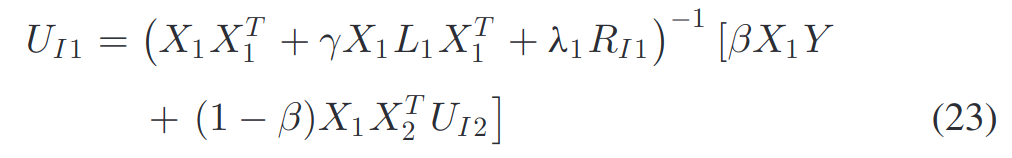

In [ ]:
U_I1

In [ ]:
(dd.X @ np.transpose(dd.X)).shape

In [ ]:
dd.X.shape

In [ ]:
dd.L_1.shape


dd.X.shape

In [ ]:
().shape




#X needs to be transposed...? 

In [ ]:
calc_R1(dd).shape

In [ ]:
import math
np.pow(columns[0],2)

In [ ]:
dd.L_1.shape

In [ ]:
dd.X.numpy().shape

In [ ]:

# print('L start, l end, u start, u end')
# print(L_start_idx)
# print(L_end_idx)
# print(U_start_idx)
# print(U_end_idx)






# print(combined_features.shape)


#nni=compute_nn_idx_dict(combined_features,n_neighbours=10)#
#L_1=compute_laplace_matrix(combined_features,n_neighbours=1000)


# L_1=compute_laplace_matrix(combined_features,n_neighbours=10)

# dd["L_1"]=L_1




In [ ]:
#@dd['Y_hat']=Y_hat

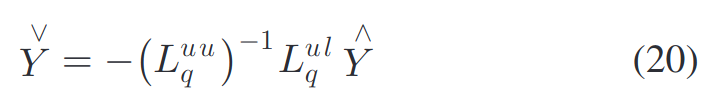

In [ ]:
dd=initialise_Y_hat_eq_20(dd)

In [ ]:
def initialise_predicted_label_matrix_eq_20(Laplace_Matrix):
    

In [ ]:
U_end_idx

In [ ]:
L_ul

In [ ]:

L_ul.min()

In [ ]:
L_label.numpy().shape


L_ul.shape




In [ ]:
L_label.numpy()


$$ \text{2. Initialise }U_{t1} \text{ and } U_{t2} \text{ as identity matrixes.}$$